In [1]:
from astropy.io import fits
import numpy as np
from astropy.table import QTable,vstack
import astropy.units as u
import astropy.utils
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import matplotlib.colors
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import lognorm
from scipy.stats import f
from astropy.timeseries import LombScargle
import time
from astropy.visualization import hist
from scipy.optimize import curve_fit
from astropy.timeseries import BoxLeastSquares
from astropy.timeseries import TimeSeries
from astropy.time import Time
from tqdm import tqdm


import functions
#import upsilon

In [8]:
t_zr=QTable.read('t_zr_1006.ecsv')
t_zg=QTable.read('t_zg_1006.ecsv')

In [9]:
t_zr

<QTable length=2407>
SourceID filter       OID        ... upsilon_flag    upsilon_period   
 int32    str2       str16       ...   float64          float64       
-------- ------ ---------------- ... ------------ --------------------
       1     zr  806203100023452 ...          0.0    1511.901550900002
       1     zr 1809211300007650 ...          1.0  0.10272079145728628
       2     zr 1809211300070217 ...          1.0  0.03860415050793573
       2     zr  806203100065936 ...          1.0  0.03133595528004489
       3     zr  806203100057022 ...          1.0   0.2284414330244274
       4     zr  806203100065940 ...          1.0 0.034914986771452876
       3     zr 1809211300054451 ...          1.0  0.06901945028829662
       5     zr  806203100060430 ...          1.0  0.17829168594744613
       6     zr 1809211300054379 ...          1.0  0.03426764689794183
    2182     zr  806203100060428 ...          1.0  0.11233686461738165
     ...    ...              ... ...          ...                  ...
    2173     zr 1809211300041551 ...          1.0  0.19345347516600214
    2175     zr  806203100021088 ...          1.0  0.07807526857678945
    2173     zr  806203100051486 ...          1.0   1.0325640428375924
    2178     zr  806203400000419 ...          1.0  0.08679668716560164
    2179     zr  806203400030604 ...          1.0  0.10285287566572764
    2179     zr 1809211300009694 ...          1.0  0.03256662441555177
    2842     zr 1809211300043132 ...          1.0  0.05967701026989896
    2180     zr 1809211300005173 ...          1.0   0.1128210441963147
    2180     zr  806203100021377 ...          1.0    0.037990021548345
    2177     zr 1809211300004981 ...          1.0  0.07214967241456488

In [11]:
t=QTable.read('t_zr_1006.ecsv')
t.add_column(np.zeros(len(t)),name='Pg1g2',index=-6)
t.add_column(np.zeros(len(t)),name='Pgug2',index=-6)
t.add_column(np.zeros(len(t)),name='Pg1gu',index=-6)
# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://sites.duke.edu/bossbackup/files/2013/02/FTestTutorial.pdf
for row in t:
    # residual sum of squares
    SS_g1=row['gaussian1_err']*7
    SS_g2=row['gaussian2_err']*4
    SS_gu=row['gumbel_err']*7
    
    Fg1gu=SS_g1/SS_gu
    Fg1g2=((SS_g1-SS_g2)/(7-4))/(SS_g2/4)
    Fgug2=((SS_gu-SS_g2)/(7-4))/(SS_g2/4)
    
    Pg1gu=1-f.cdf(Fg1gu,7,7)
    Pg1g2=1-f.cdf(Fg1g2,3,4)
    Pgug2=1-f.cdf(Fgug2,3,4)
    
    row['Pg1g2']=Pg1g2
    row['Pgug2']=Pgug2
    row['Pg1gu']=Pg1gu
    
t.write('t_zr_1024.ecsv',overwrite=True)

In [12]:
t=QTable.read('t_zg_1006.ecsv')
t.add_column(np.zeros(len(t)),name='Pg1g2',index=-6)
t.add_column(np.zeros(len(t)),name='Pgug2',index=-6)
t.add_column(np.zeros(len(t)),name='Pg1gu',index=-6)
# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://sites.duke.edu/bossbackup/files/2013/02/FTestTutorial.pdf
for row in t:
    # residual sum of squares
    SS_g1=row['gaussian1_err']*7
    SS_g2=row['gaussian2_err']*4
    SS_gu=row['gumbel_err']*7
    
    Fg1gu=SS_g1/SS_gu
    Fg1g2=((SS_g1-SS_g2)/(7-4))/(SS_g2/4)
    Fgug2=((SS_gu-SS_g2)/(7-4))/(SS_g2/4)
    
    Pg1gu=1-f.cdf(Fg1gu,7,7)
    Pg1g2=1-f.cdf(Fg1g2,3,4)
    Pgug2=1-f.cdf(Fgug2,3,4)
    
    row['Pg1g2']=Pg1g2
    row['Pgug2']=Pgug2
    row['Pg1gu']=Pg1gu

t.write('t_zg_1024.ecsv',overwrite=True)

In [13]:
t_zr=QTable.read('t_zr_1024.ecsv')
t_zg=QTable.read('t_zg_1024.ecsv')

for row in t_zr:
    if row['shape']=='g2':
        if row['Pg1g2']>0.1 or row['Pgug2']>0.1:
            row['shape']=['g1','gu'][np.array([row['gaussian1_err'],row['gumbel_err']]).argmin()]
            
for row in t_zg:
    if row['shape']=='g2':
        if row['Pg1g2']>0.1 or row['Pgug2']>0.1:
            row['shape']=['g1','gu'][np.array([row['gaussian1_err'],row['gumbel_err']]).argmin()]      

t_zr.write('t_zr_1024.ecsv',overwrite=True)
t_zg.write('t_zg_1024.ecsv',overwrite=True)

In [2]:
t_zr=QTable.read('t_zr_1024.ecsv')
t_zg=QTable.read('t_zg_1024.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

var_zr=t_zr[t_zr['sf']<1/(100*len(t_zr))] #99% chance variabe
var_zg=t_zg[t_zg['sf']<1/(100*len(t_zg))] #99% chance variabe

nonvar_zr=t_zr[t_zr['sf']>1/(100*len(t_zr))]
nonvar_zg=t_zg[t_zg['sf']>1/(100*len(t_zg))]

In [3]:
def cut_LNP_SIG(t,period,LNP_SIG):
    #t=t[(t['period']<period[0])|(t['period']>period[1])]
    #t=t[(t['period']<period[2])|(t['period']>period[3])]
    #if len(period)>4:
        #t=t[(t['period']<period[4])|(t['period']>period[5])]
    t=t[t['LNP_SIG']<LNP_SIG]
    return t

t_zr=cut_LNP_SIG(var_zr,_,1/(100*len(t_zr)))
t_zg=cut_LNP_SIG(var_zg,_,1/(100*len(t_zg)))


# cut power ratios
obj_zr=t_zr[t_zr['power']/t_zr['power_c']>=1]
obj_zg=t_zg[t_zg['power']/t_zg['power_c']>=1]


# cut close periods
obj_zr=obj_zr[np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']>1e-2]
obj_zg=obj_zg[np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']>1e-2]

obj_zr=obj_zr[(np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']<0.49)|(np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']>0.91)|(obj_zr['LNP_SIG']<1e-30)]
obj_zg=obj_zg[(np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']<0.49)|(np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']>0.91)|(obj_zg['LNP_SIG']<1e-30)]




# restore original table for ploting reasons
t_zr=QTable.read('t_zr_1024.ecsv')
t_zg=QTable.read('t_zg_1024.ecsv')

# choose only OID with highest numobs
mask=np.zeros(len(obj_zr))+1
for i,obj in enumerate(obj_zr):
    copy=t_zr[t_zr['SourceID']==obj['SourceID']]
    if len(copy)==1:
        if obj['numobs']<50:
            mask[i]=0
    if len(copy)>1:
        if obj['OID']!=copy['OID'][copy['numobs'].argmax()]:
            mask[i]=0
        if obj['numobs']<50:
            mask[i]=0
obj_zr=obj_zr[mask==1]


mask=np.zeros(len(obj_zg))+1
for i,obj in enumerate(obj_zg):
    copy=t_zg[t_zg['SourceID']==obj['SourceID']]
    if len(copy)==1:
        if obj['numobs']<50:
            mask[i]=0
    if len(copy)>1:
        if obj['OID']!=copy['OID'][copy['numobs'].argmax()]:
            mask[i]=0
        if obj['numobs']<50:
            mask[i]=0
obj_zg=obj_zg[mask==1]

In [4]:
obj_zr.show_in_notebook()

In [5]:
obj_zg.show_in_notebook()

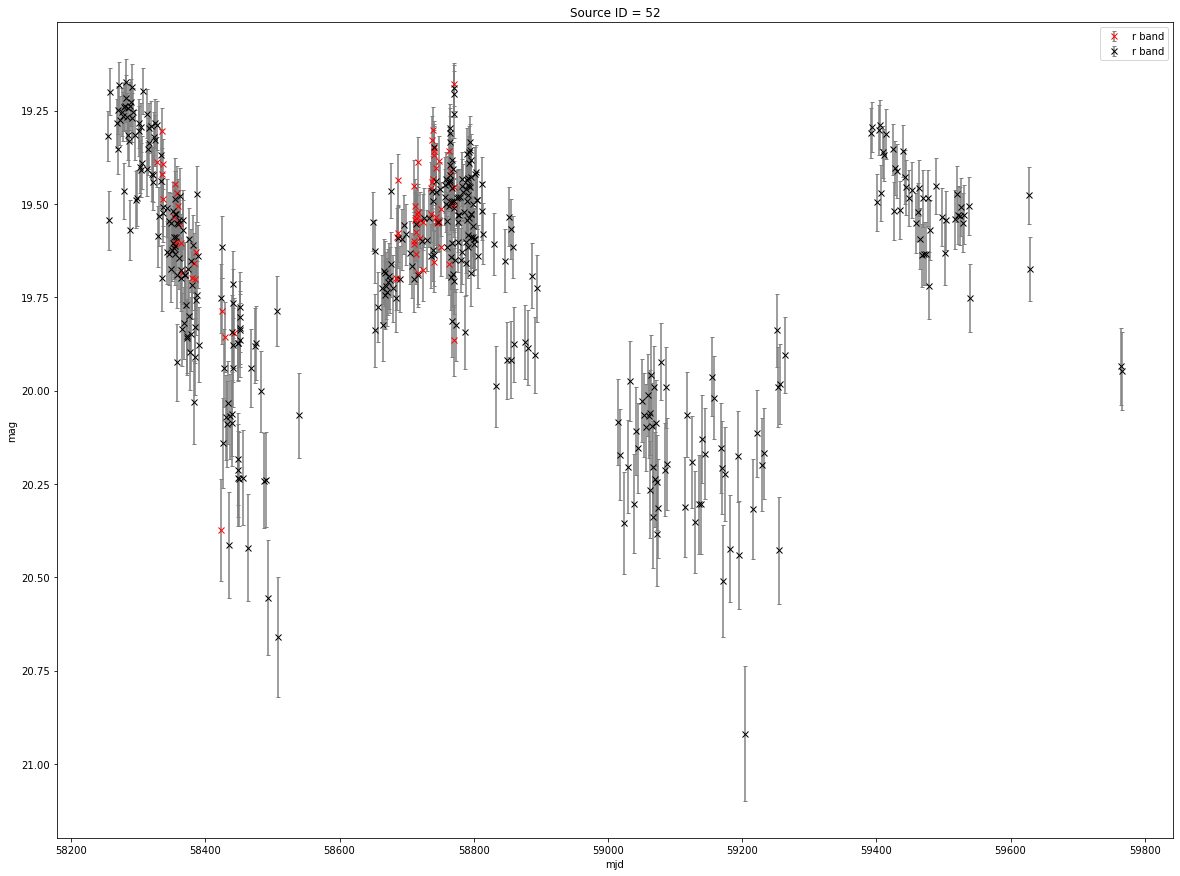

0.05060821258505381 0.007833020026423389 0.026125014733712922 False
g2


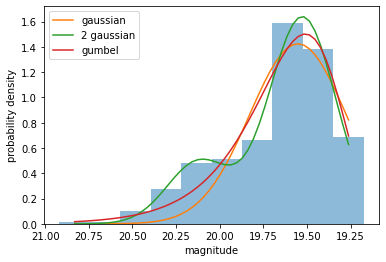

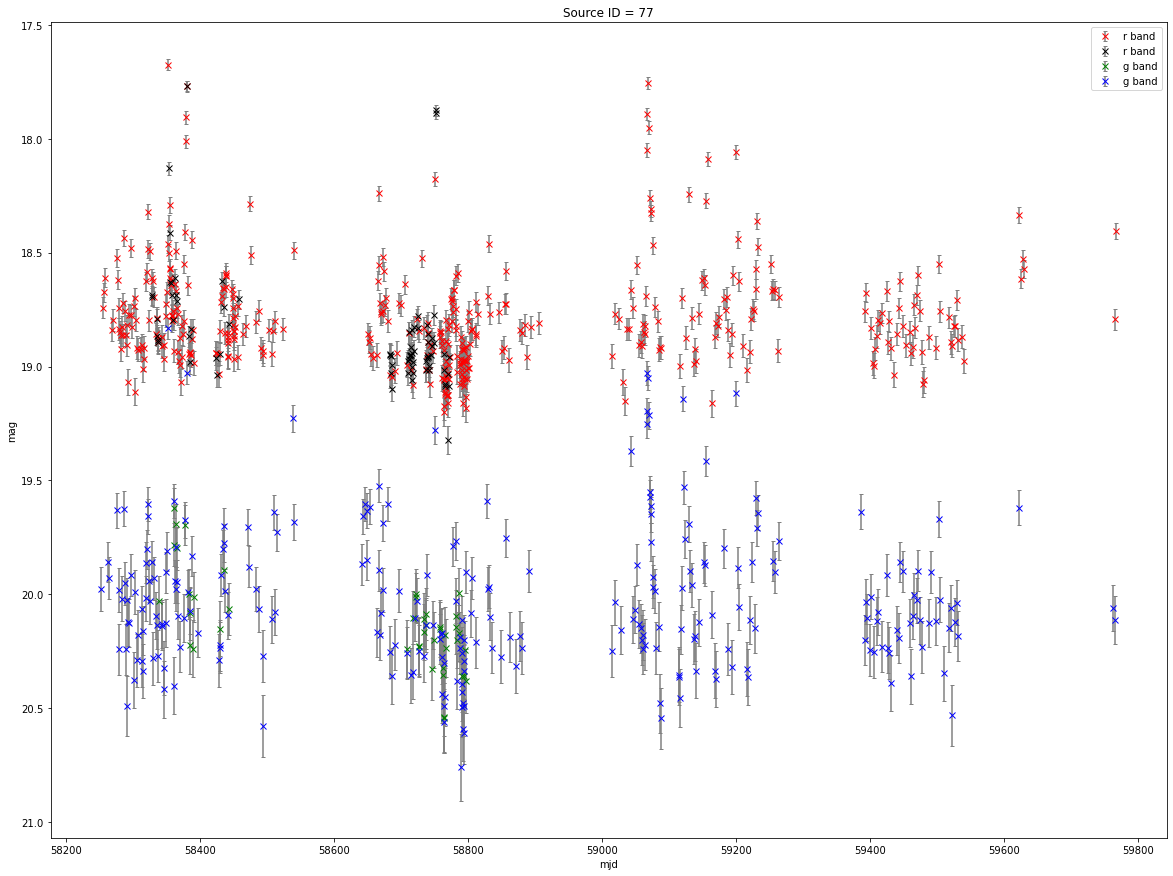

0.010941253454579771 0.0022451831278411214 0.04598158685382897 True
g1


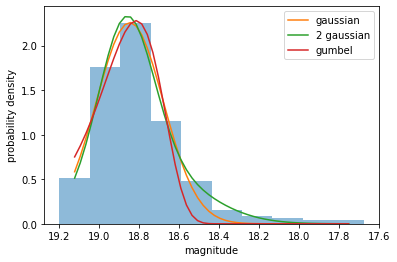

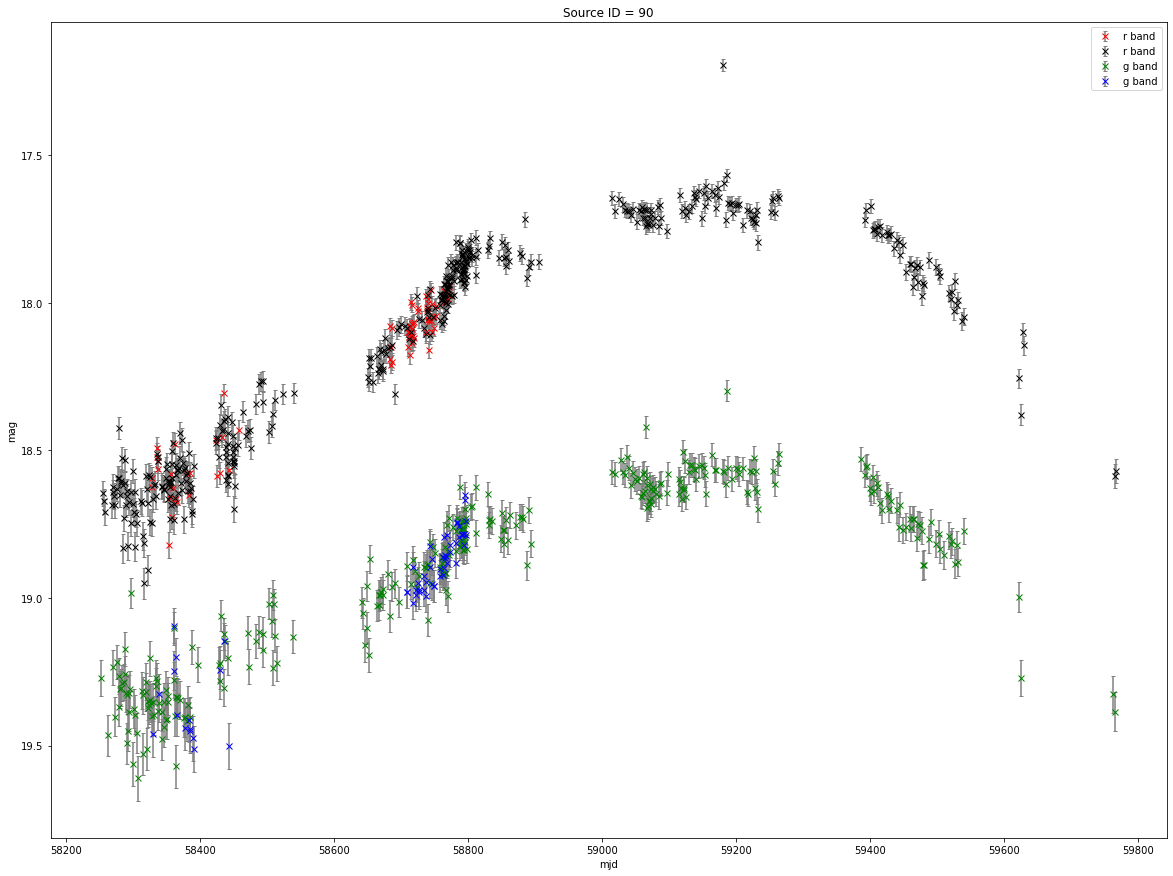

0.18947997991941207 0.020160519579386485 0.15060952910358819 False
g2


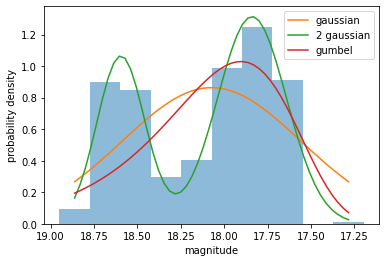

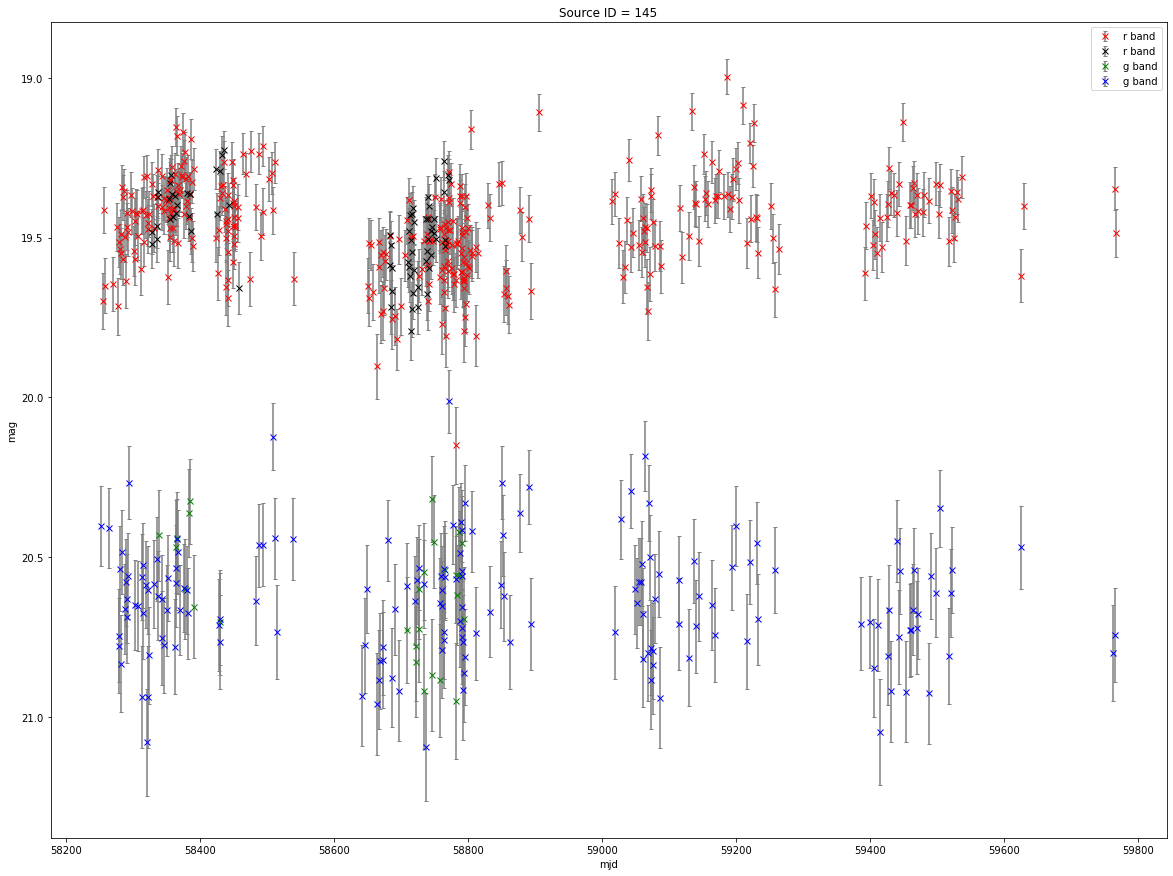

0.014671911593230497 0.003428865224048767 0.0160385433525674 False
g2


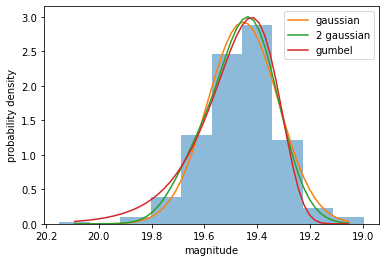

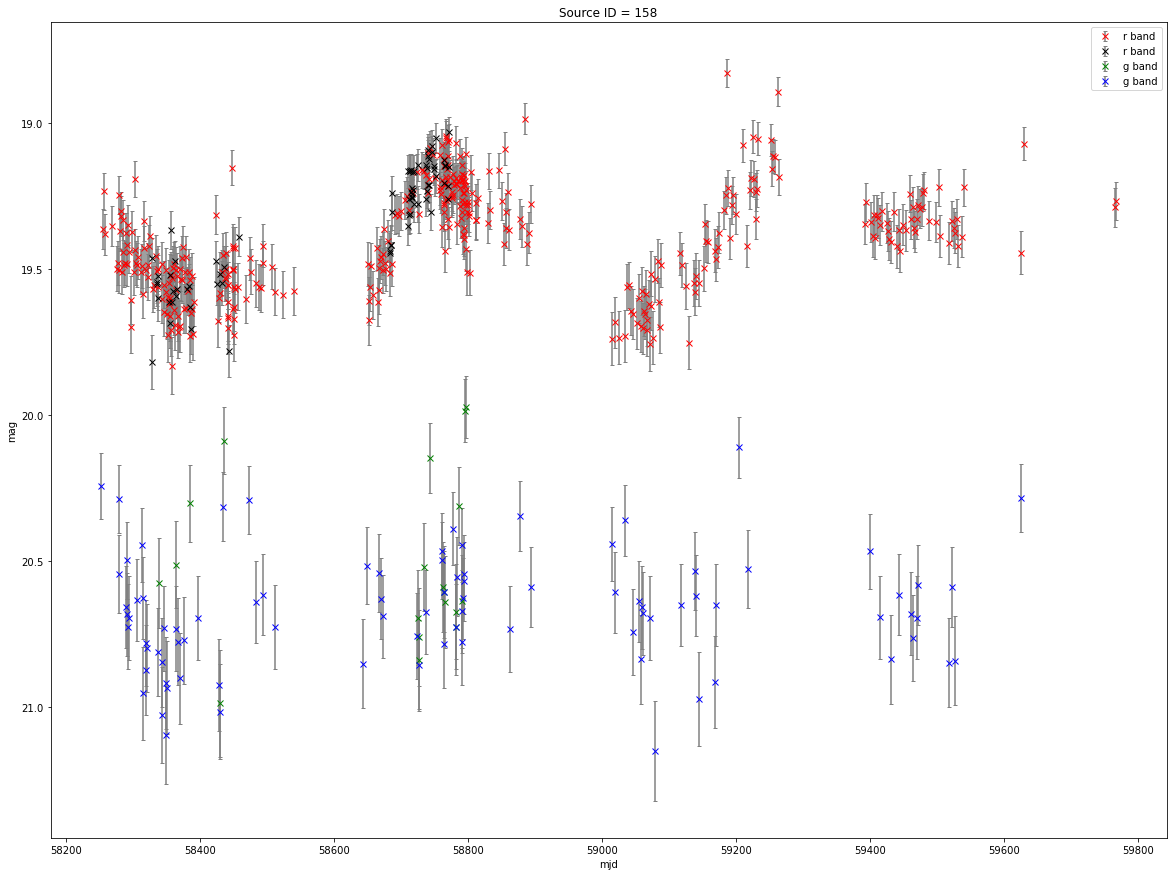

0.04033986549469937 0.01823640263202334 0.044388907661337296 False
g1


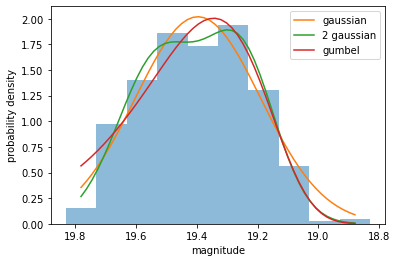

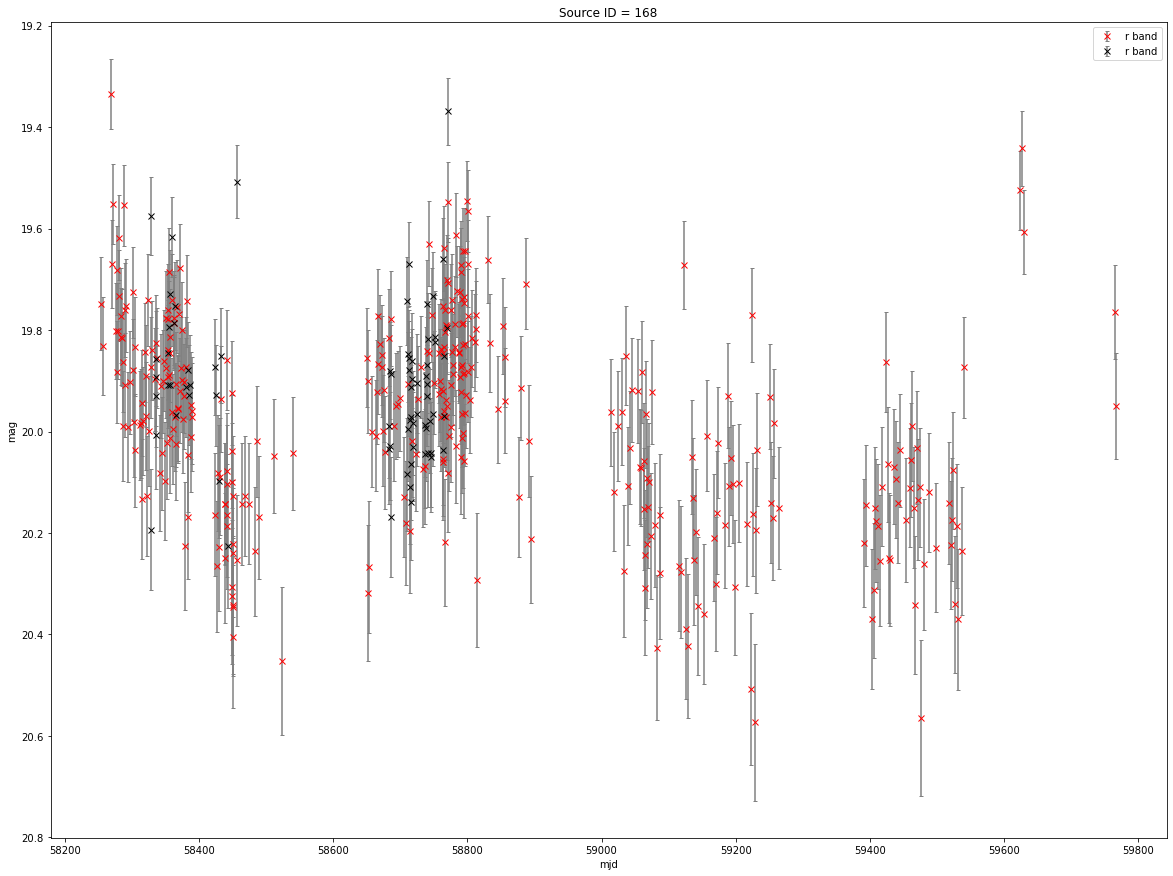

0.02288762441783082 0.005203361869715385 0.015654582112170936 False
g2


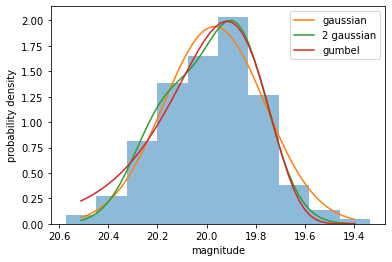

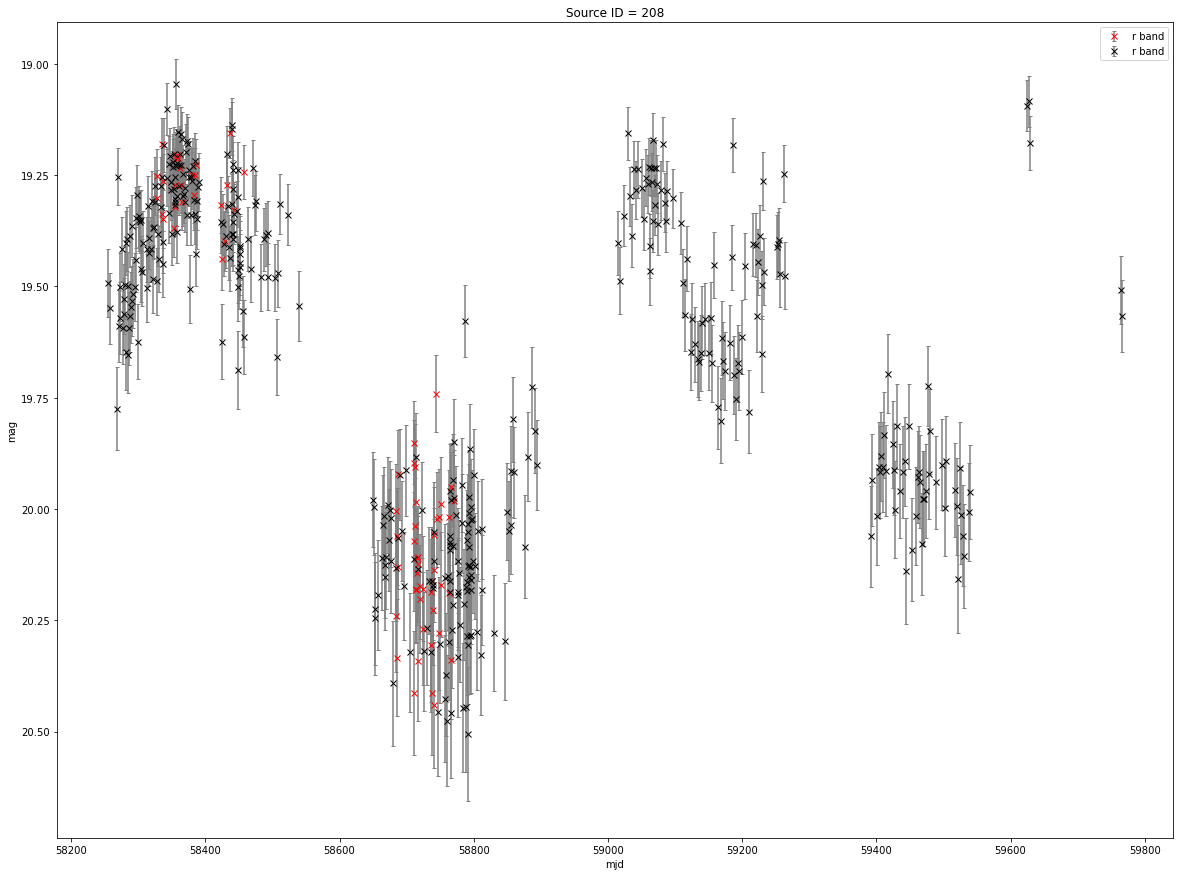

0.17628564083475765 0.011430201762155813 0.16293005537513924 False
g2


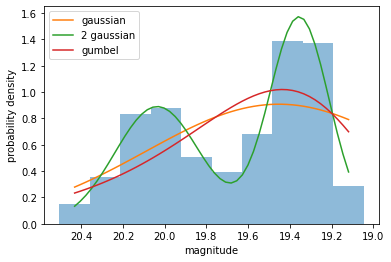

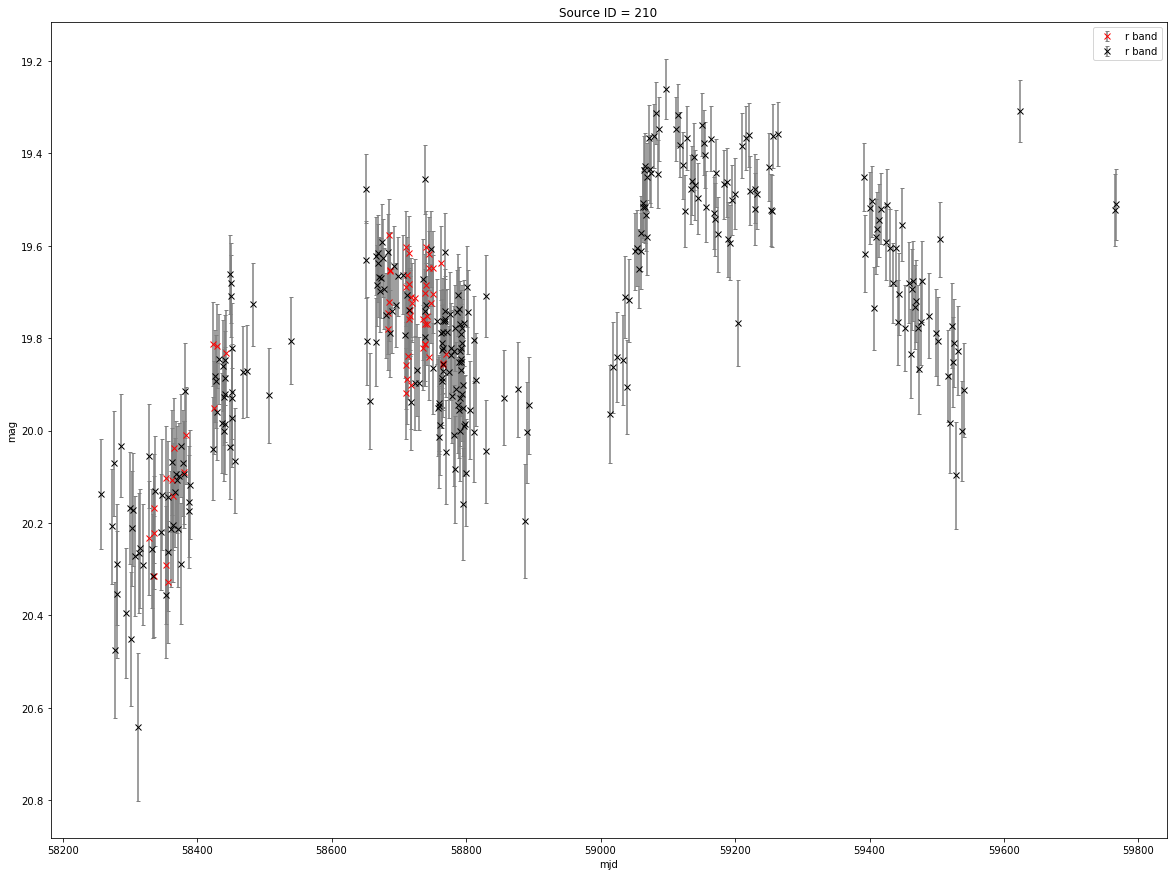

0.0395216855981239 0.06772269663685082 0.06811441803218907 False
g1


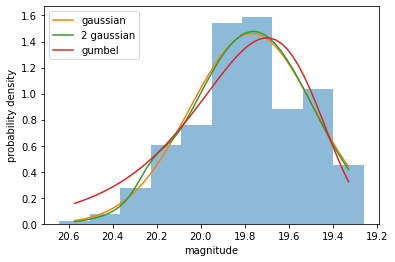

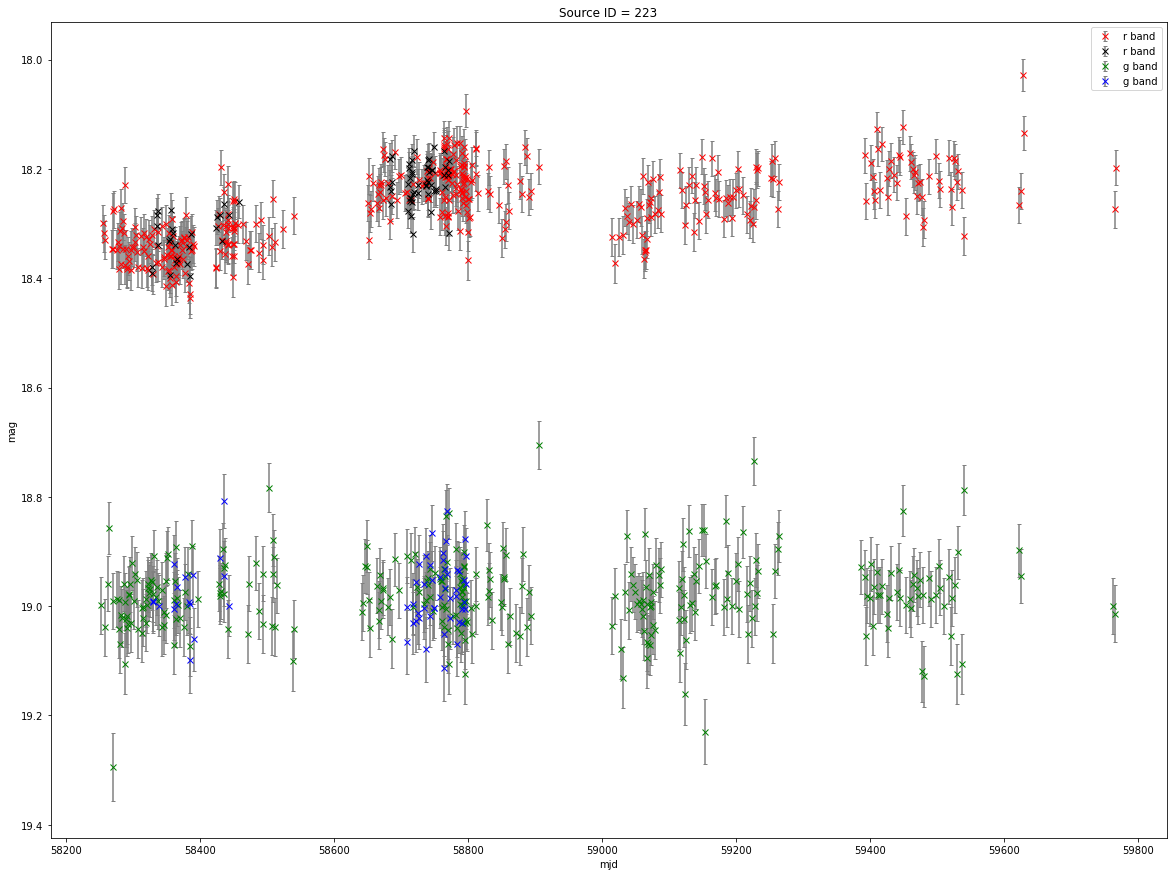

0.6556572034846606 0.00495464164525256 0.44621028454143513 False
g2


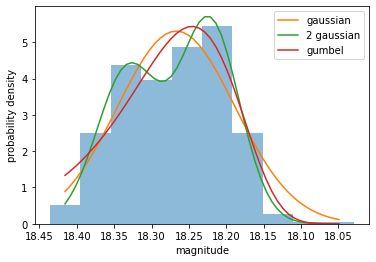

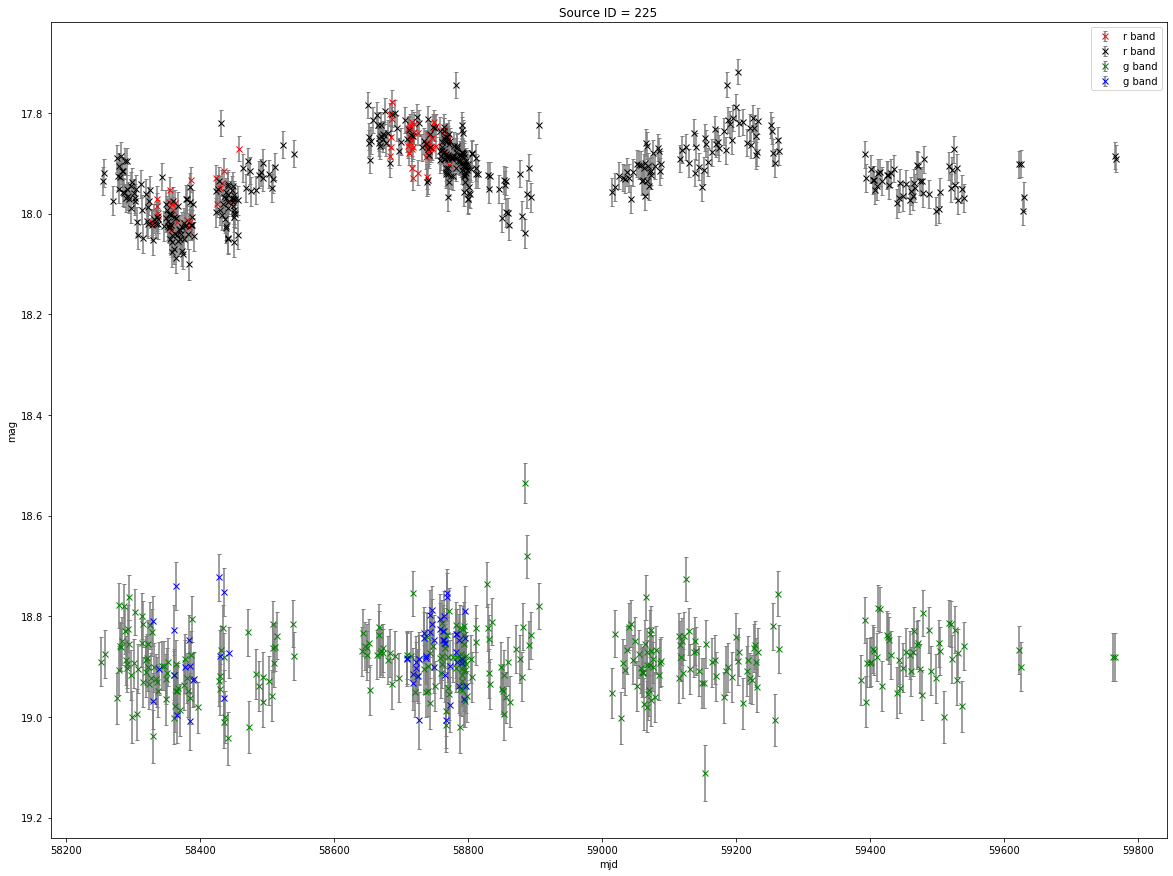

0.1648871949430961 0.08247832609554441 0.1393762811399525 True
gu


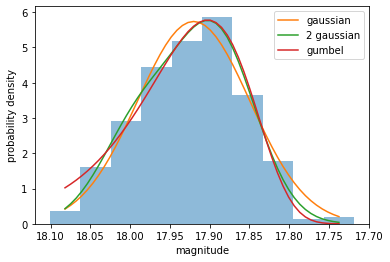

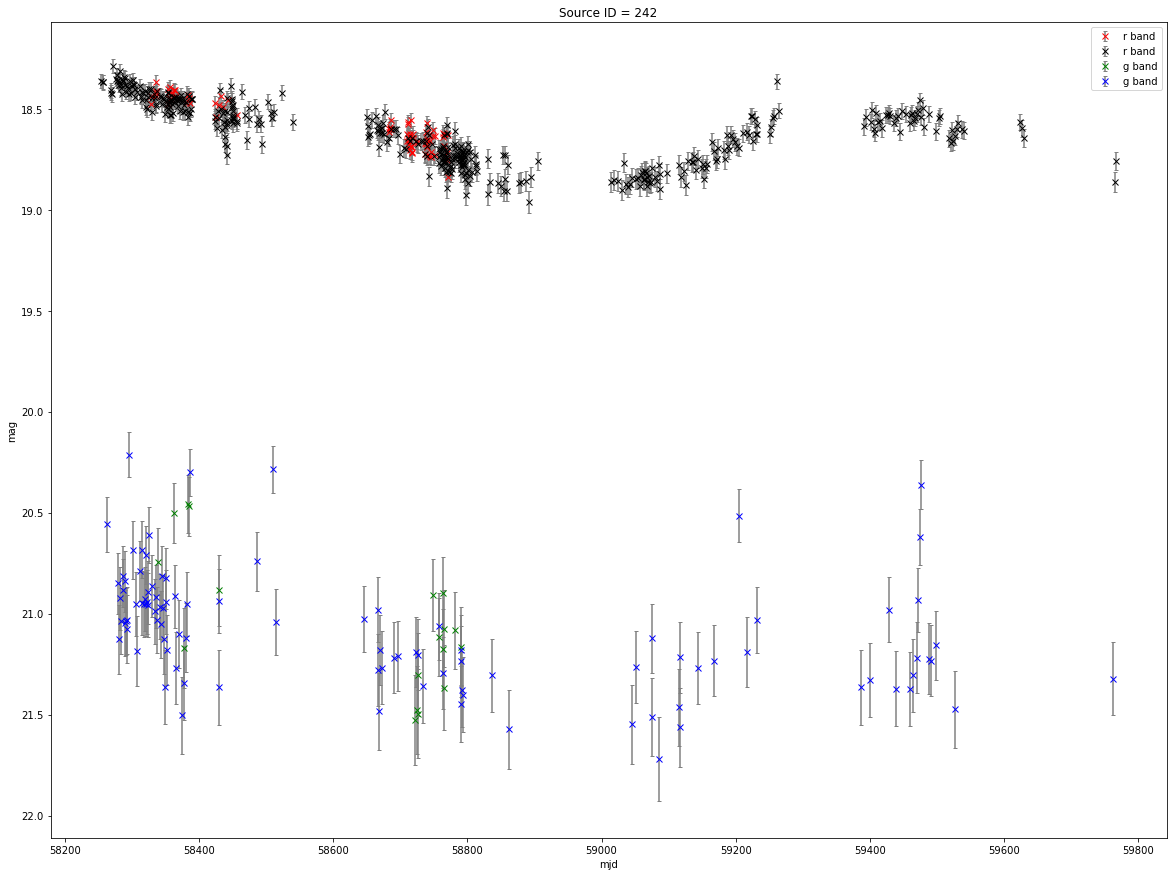

0.17372979165207011 0.07120983817504452 0.15957578862205996 False
gu


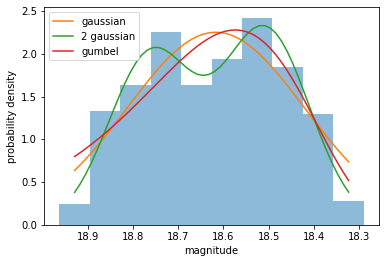

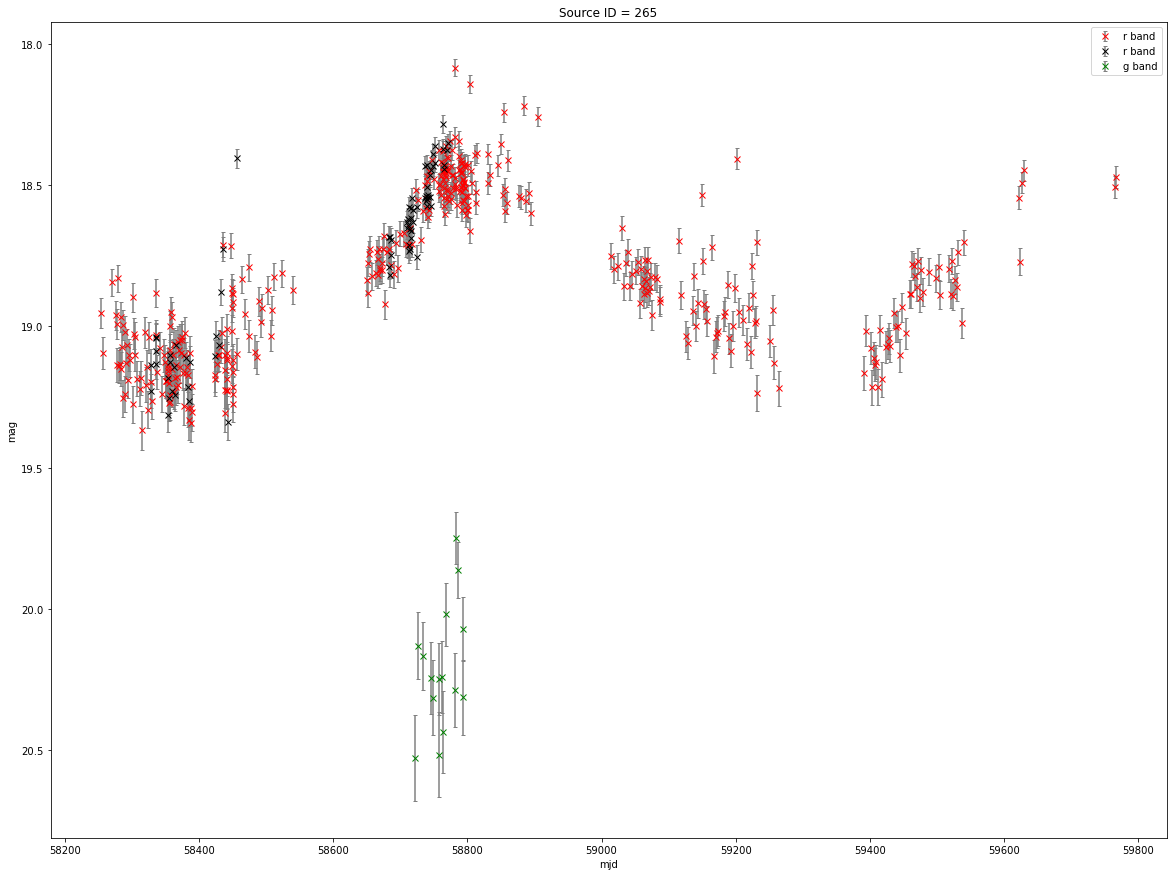

0.15591853280147774 0.041643590614158316 0.15822709610965577 False
g2


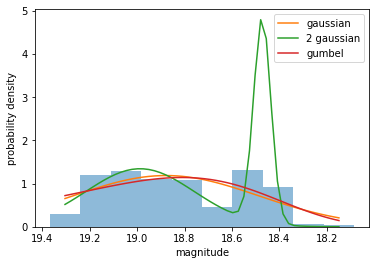

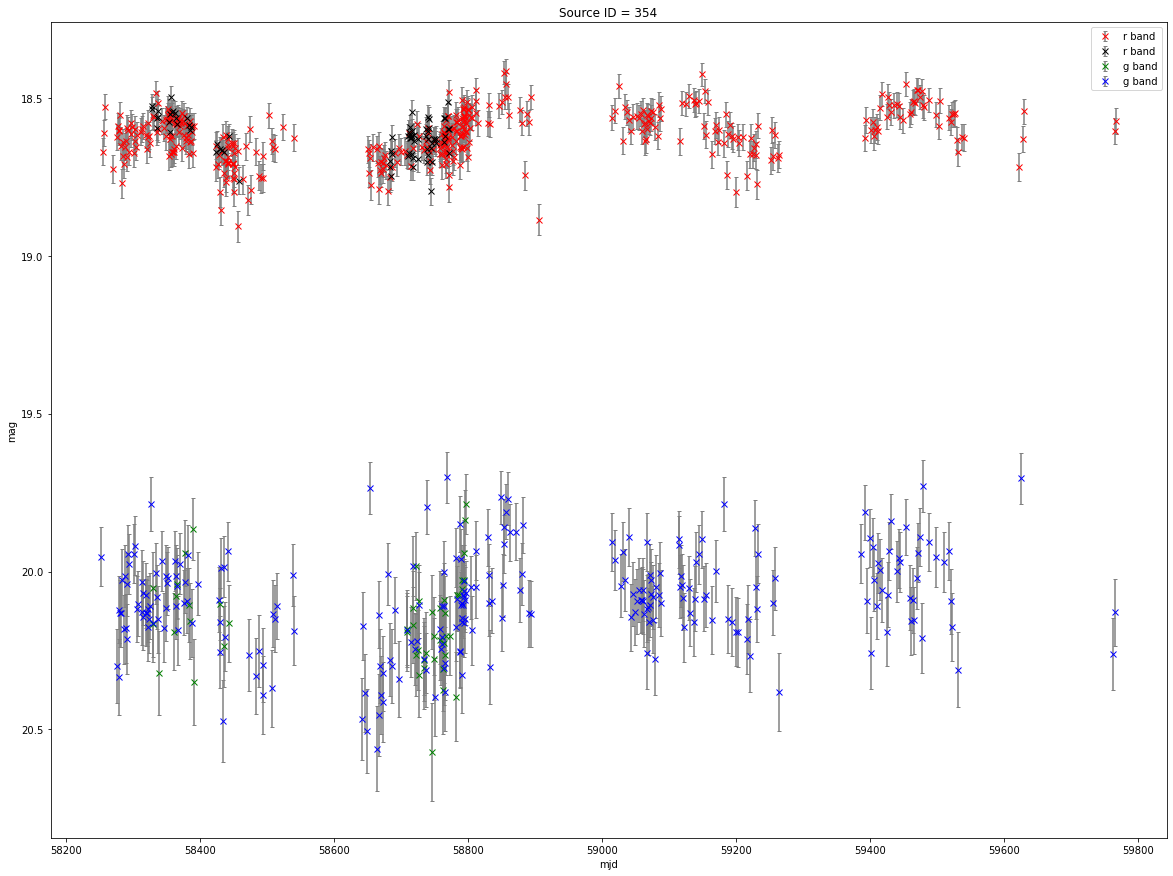

0.045137289304433656 0.008946204497543917 0.1340496603290334 True
g1


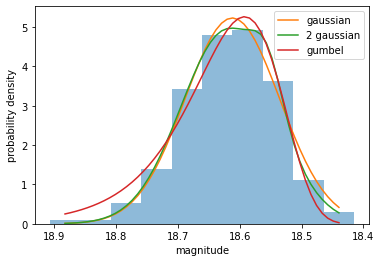

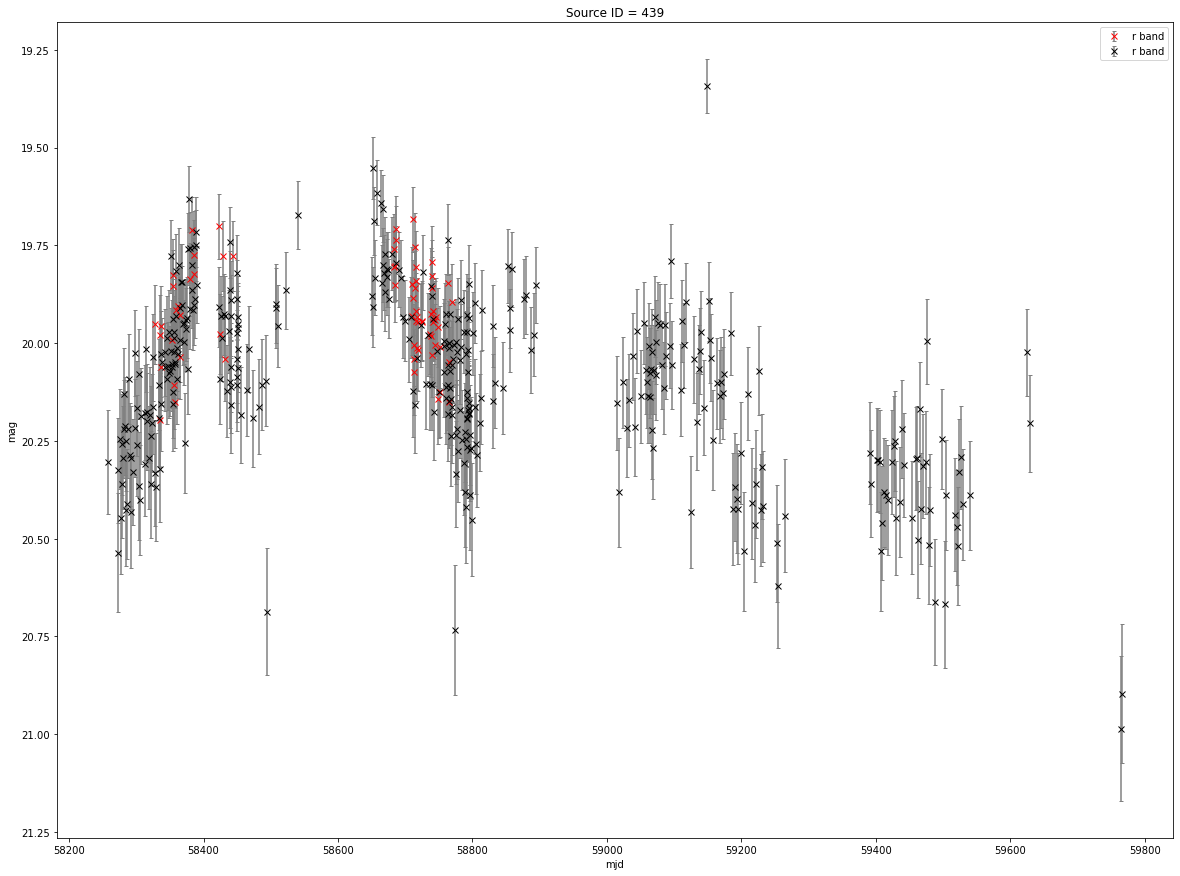

0.008169558383902745 0.0012830310537330653 0.009699418886023034 False
g2


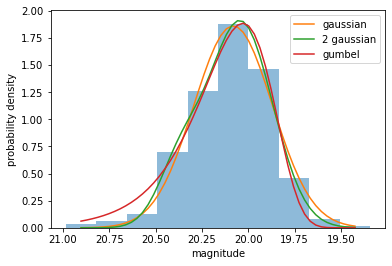

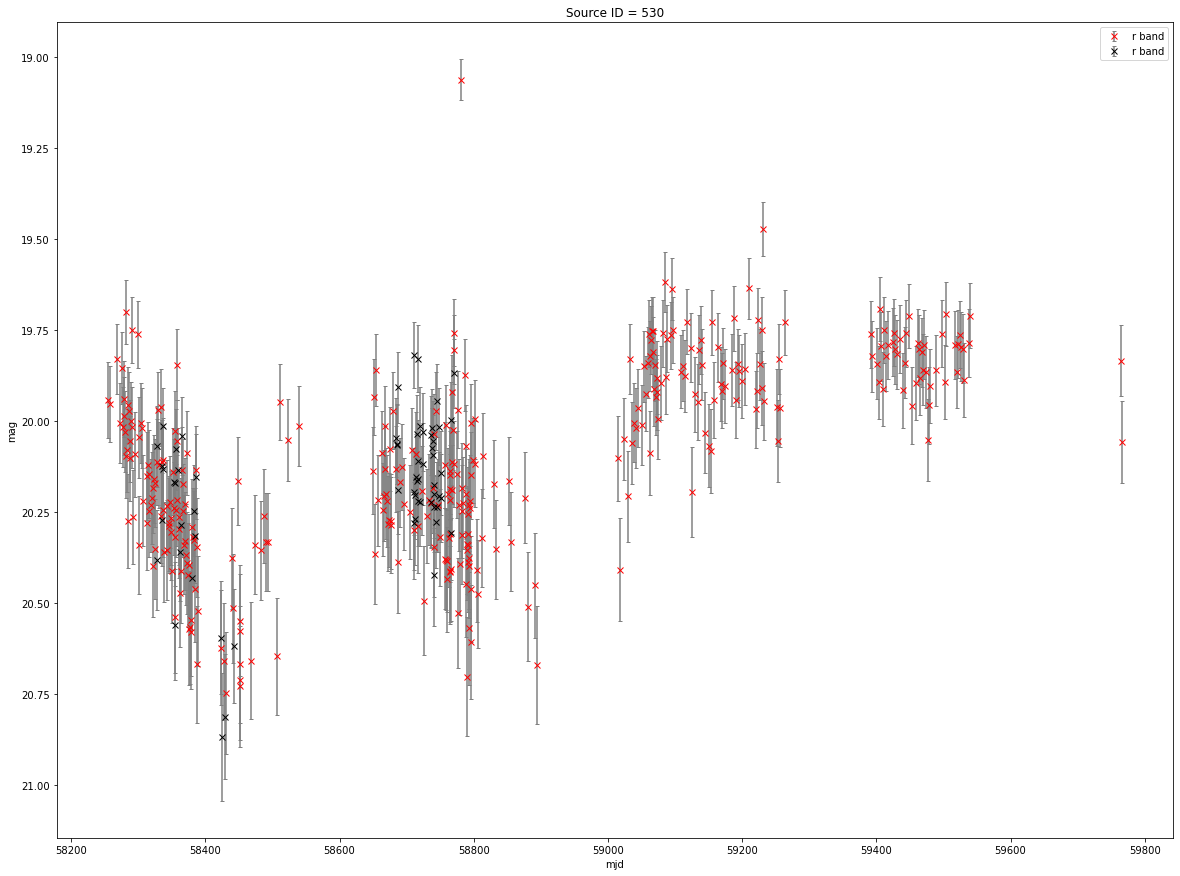

0.05741327656004679 0.006035405655888657 0.05095791268111598 False
g2


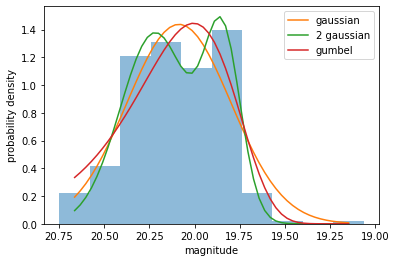

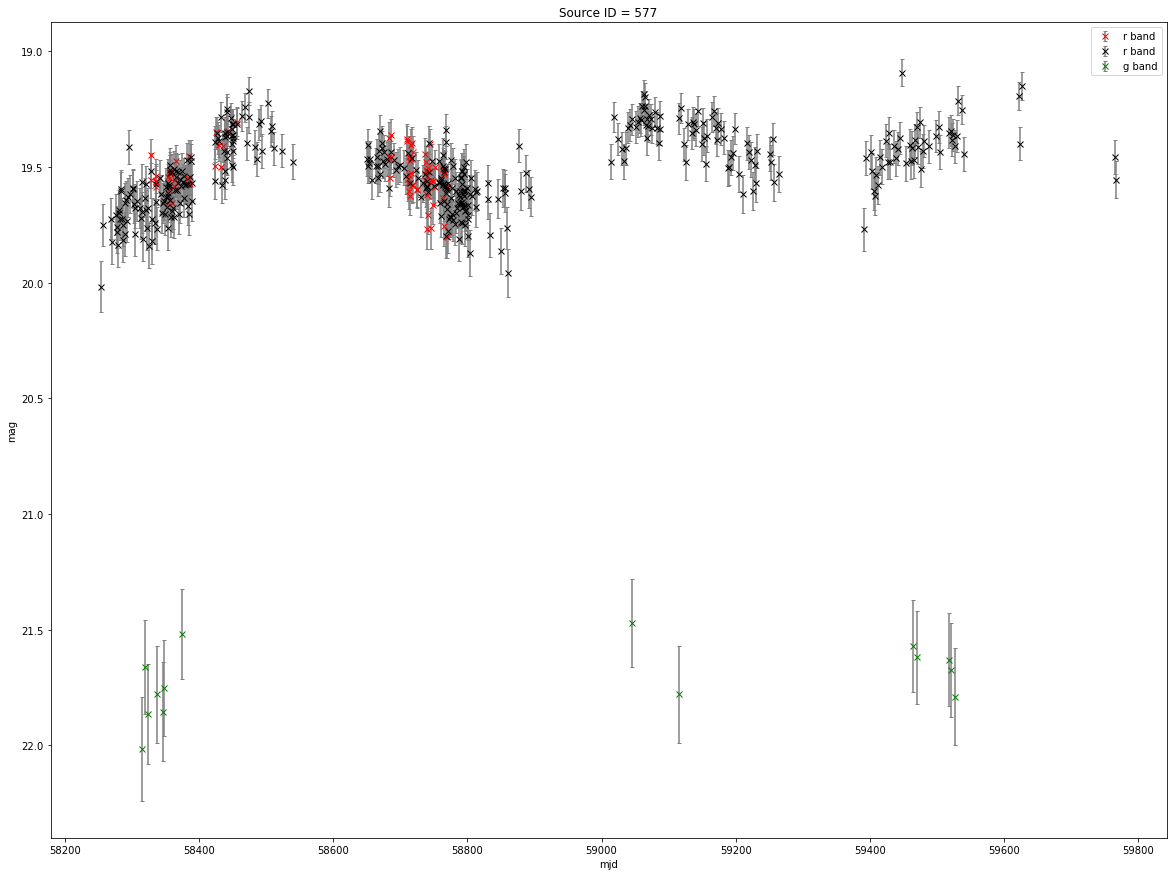

0.049349970380050893 0.005259658863852333 0.12249745592155693 False
g2


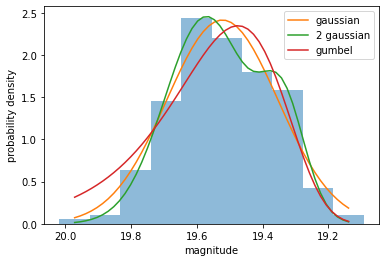

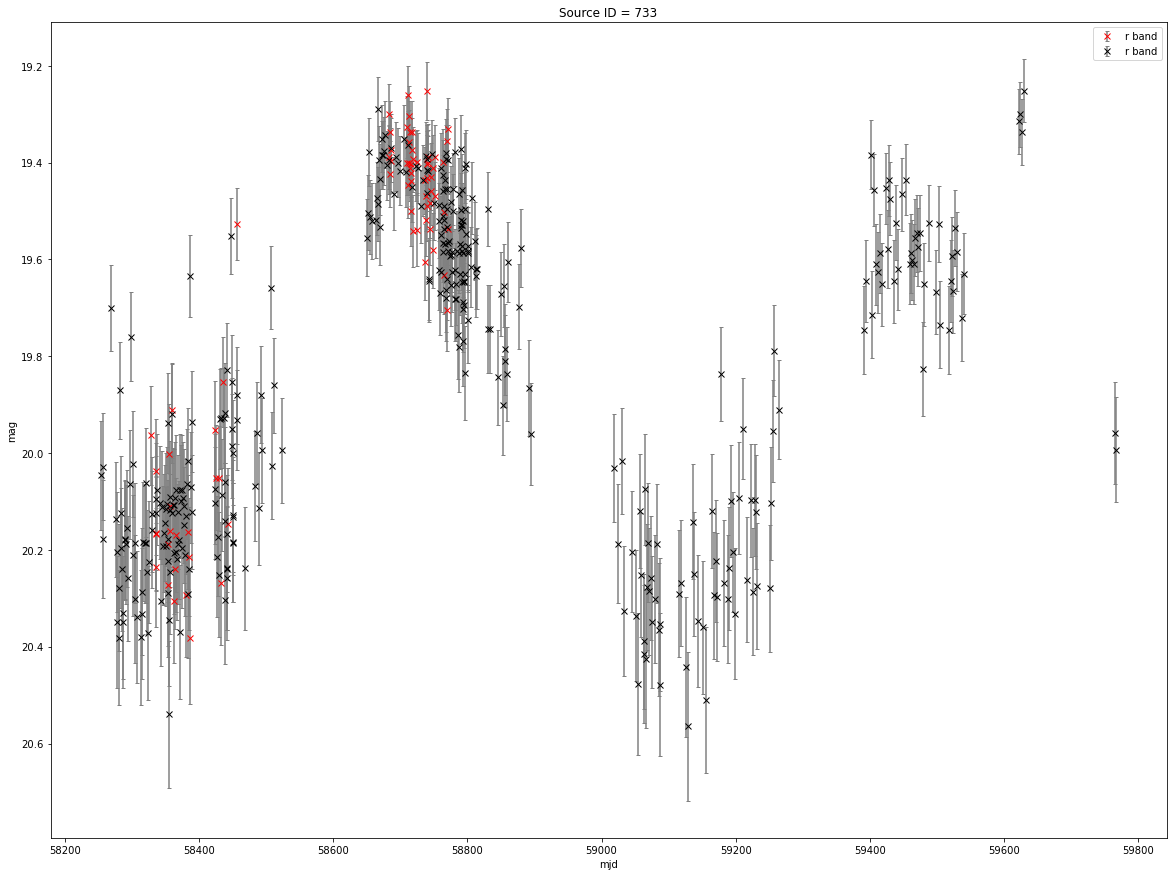

0.2585879417638937 0.008728960100307511 0.2566573552598427 False
g2


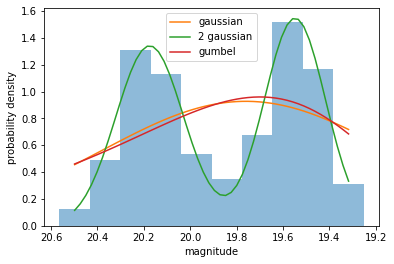

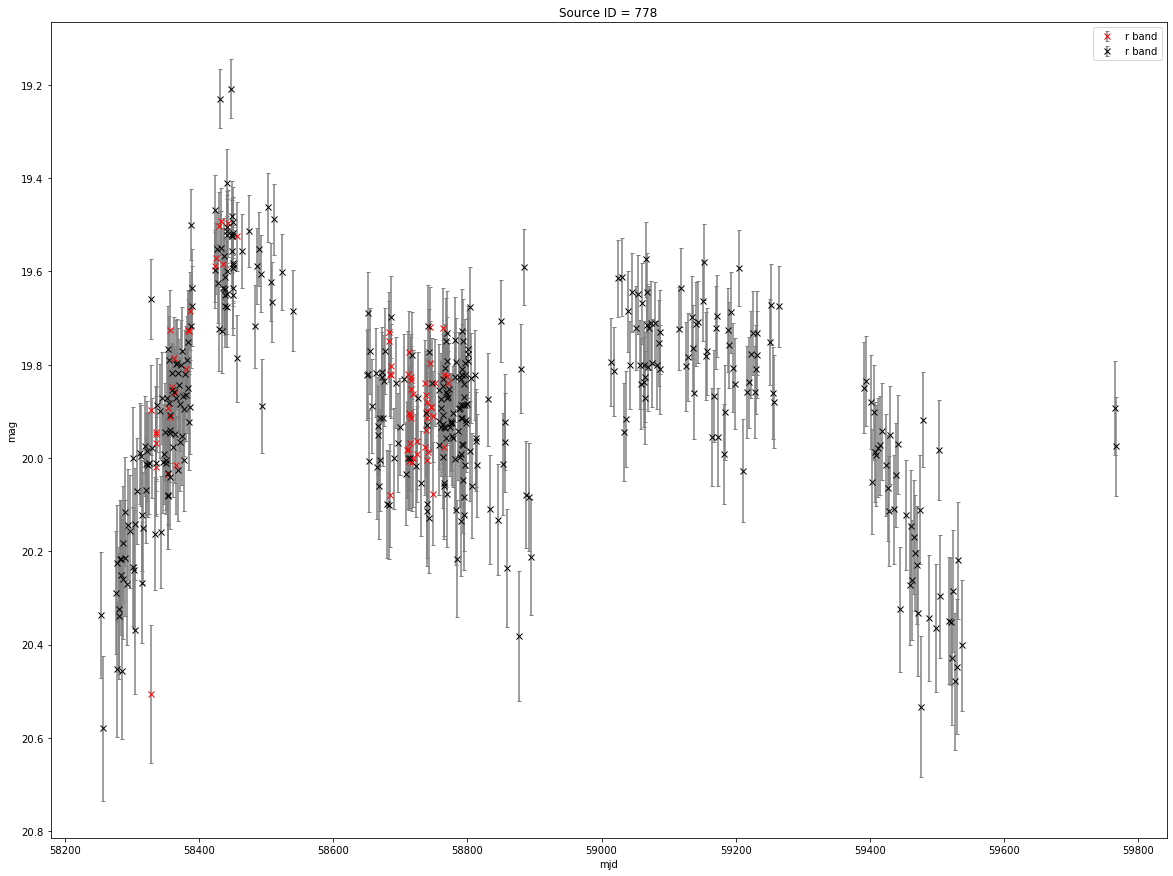

0.02129877740206548 0.010778210538601906 0.040474267113059584 True
g1


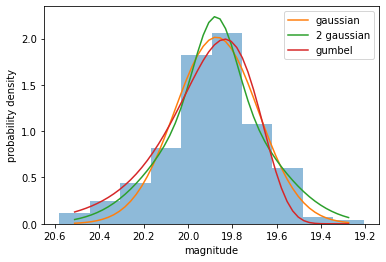

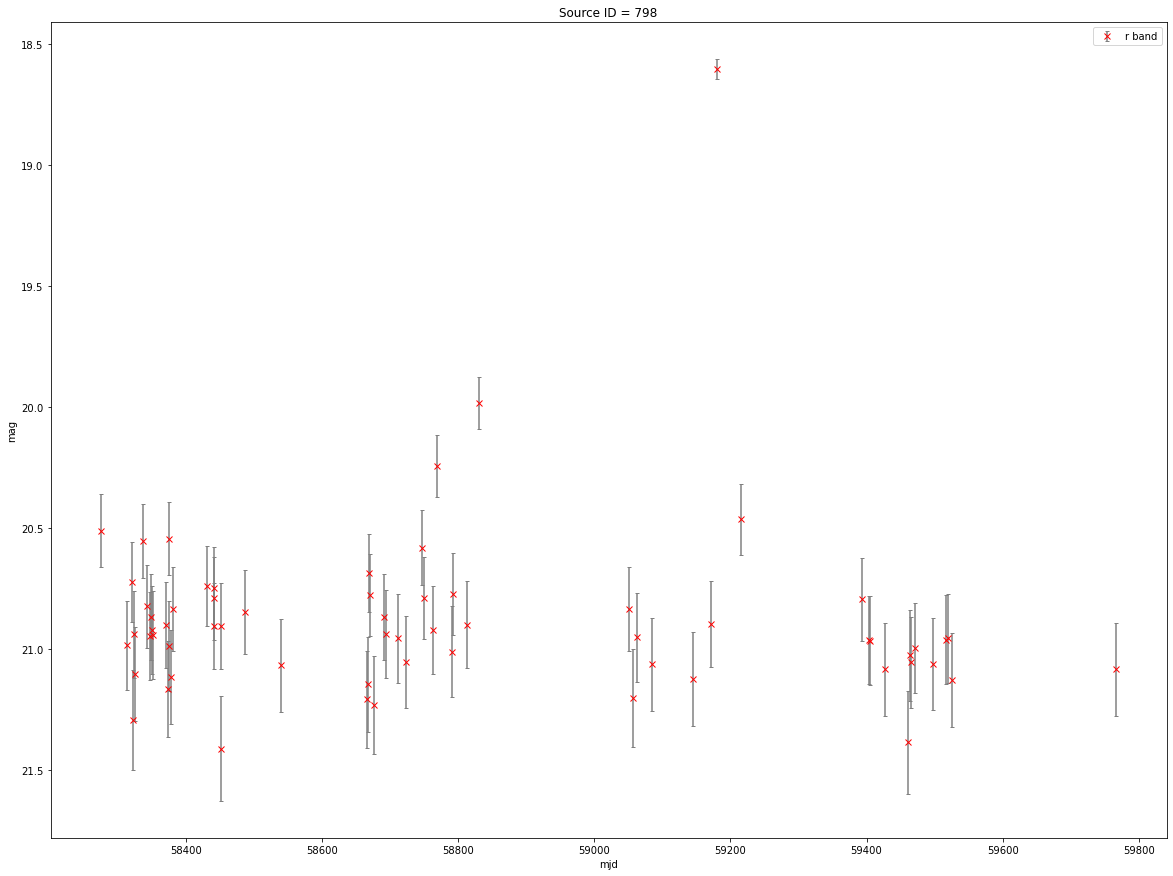

0.0066184614489440225 0.0012491191023087985 0.008427087749437494 True
g1


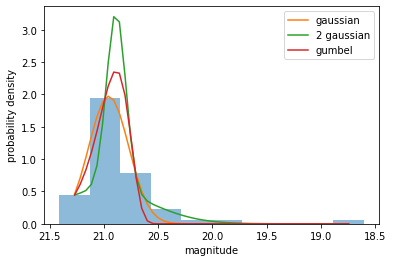

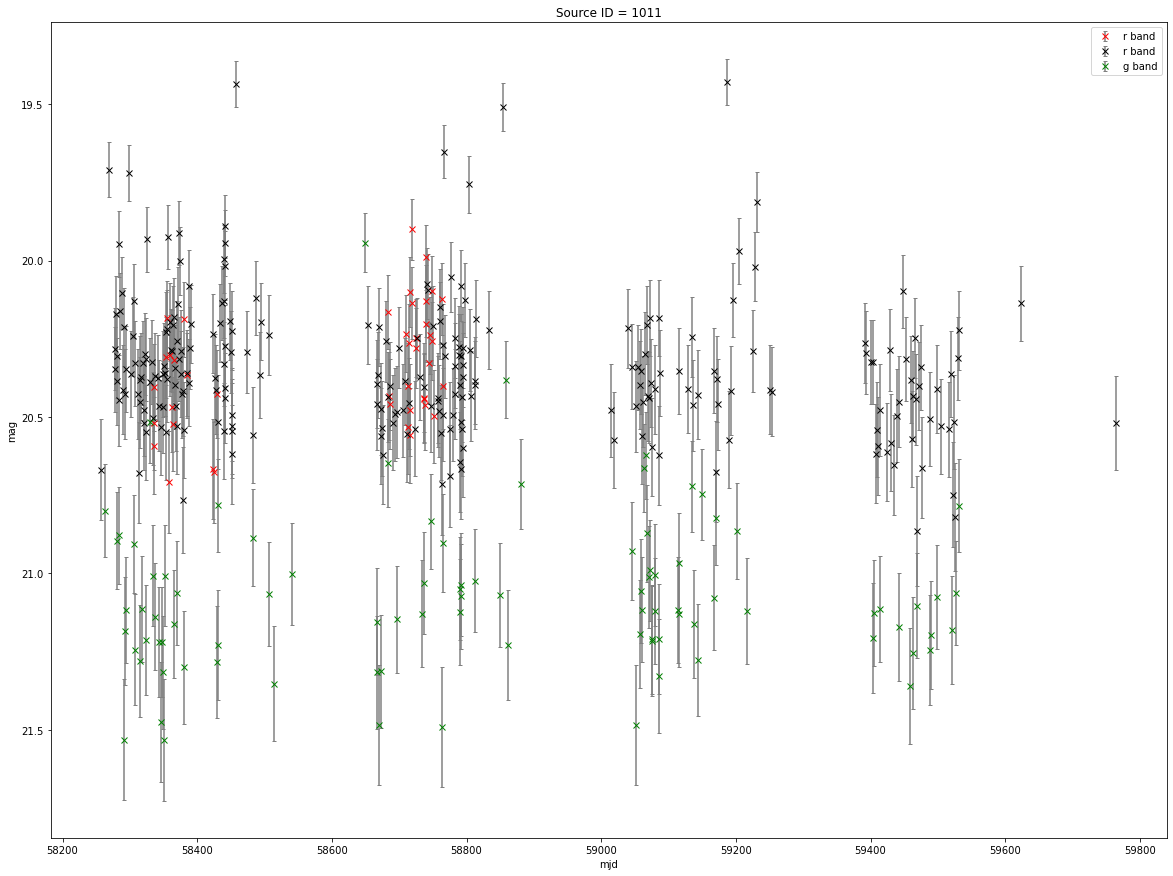

0.012321278144437665 0.002121941219061029 0.05760208791415083 True
g1


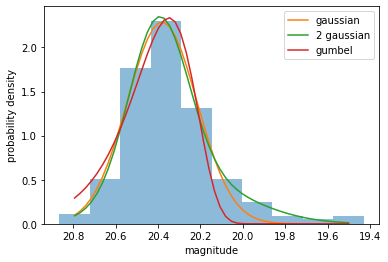

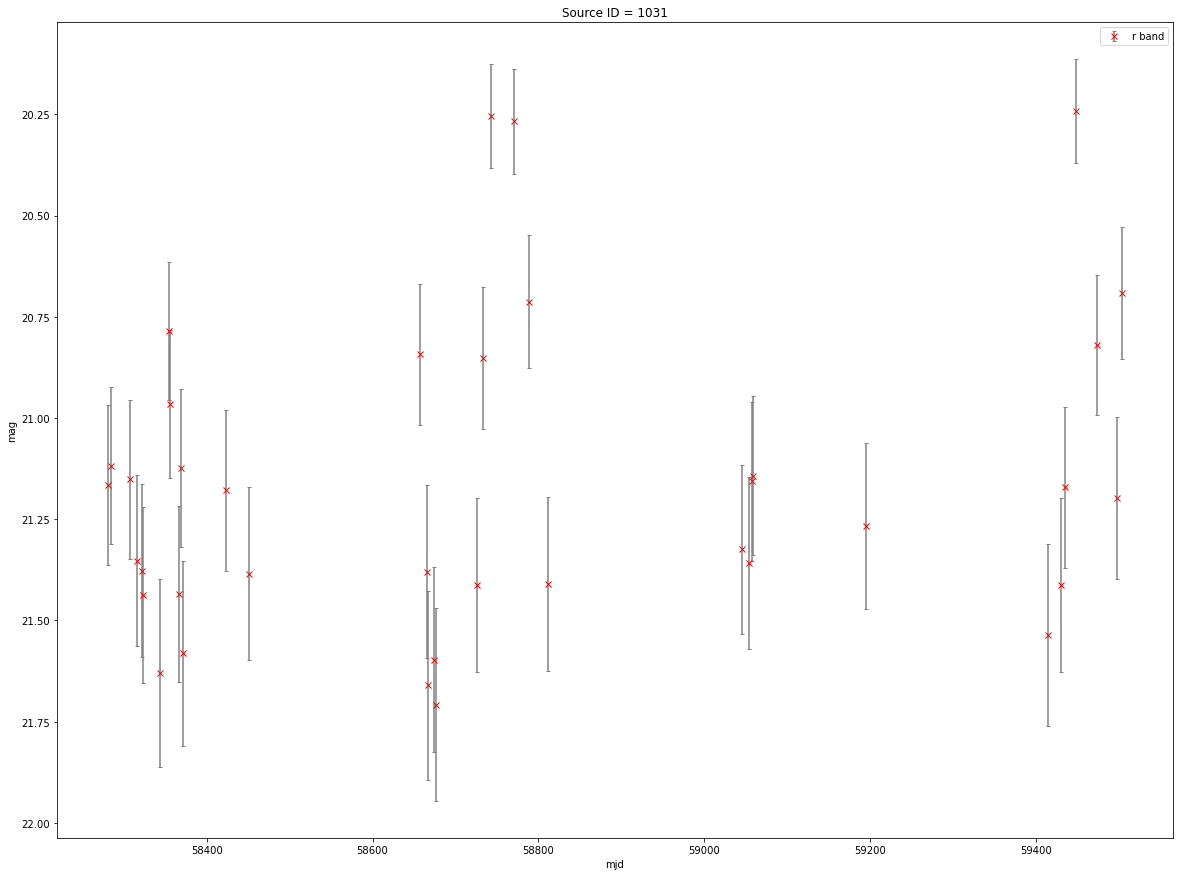

0.24562456236838526 0.31411302248923867 0.2670568070627711 False
g1


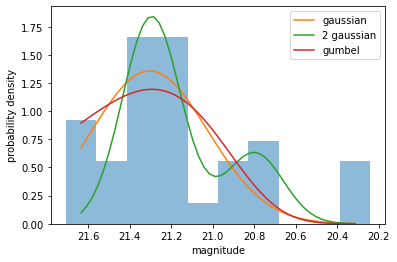

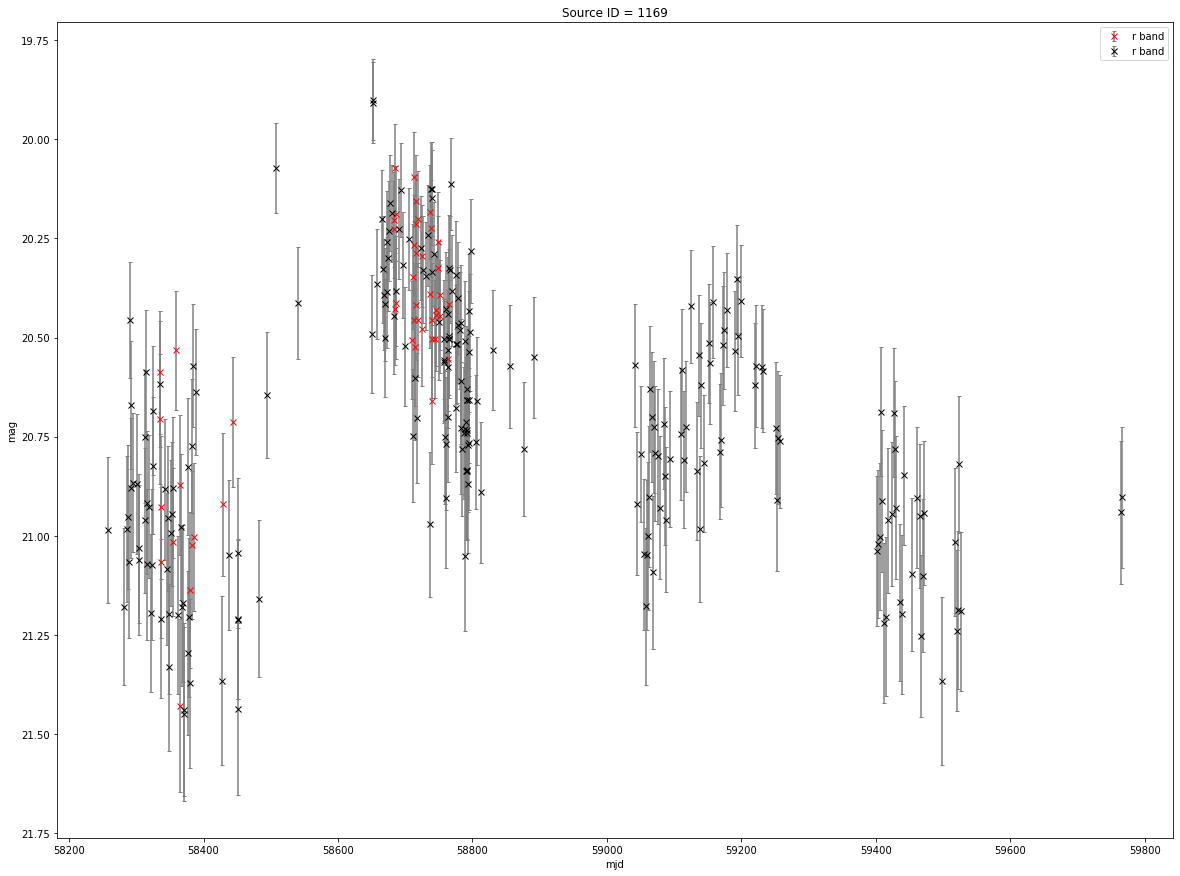

0.013330406904582514 0.01702011434139802 0.016295705549296807 True
g1


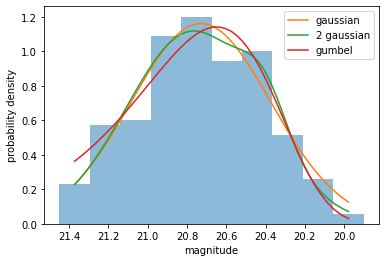

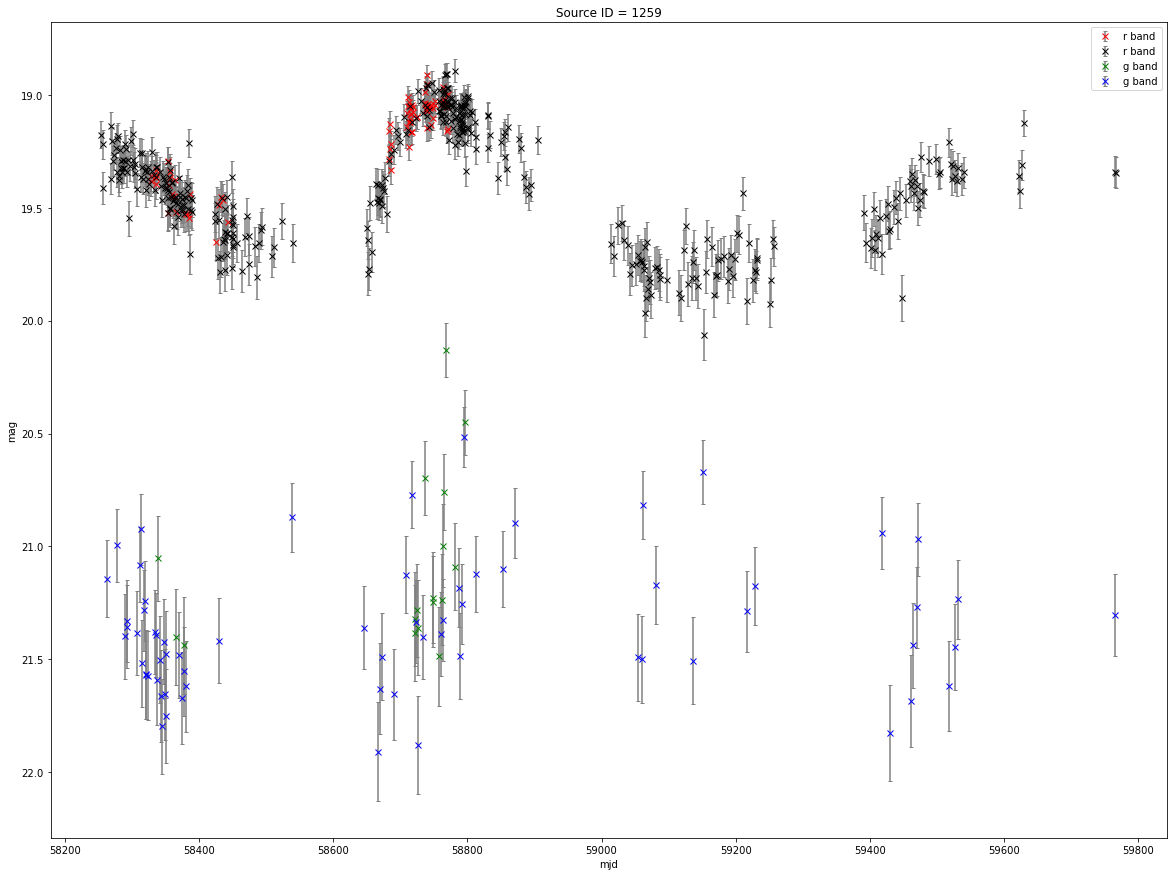

0.0866635374439143 0.10843782706678352 0.095448189013291 False
g1


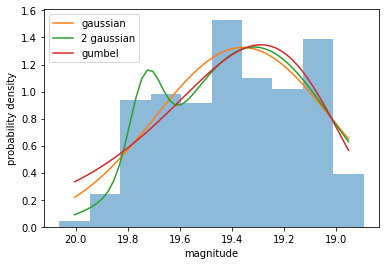

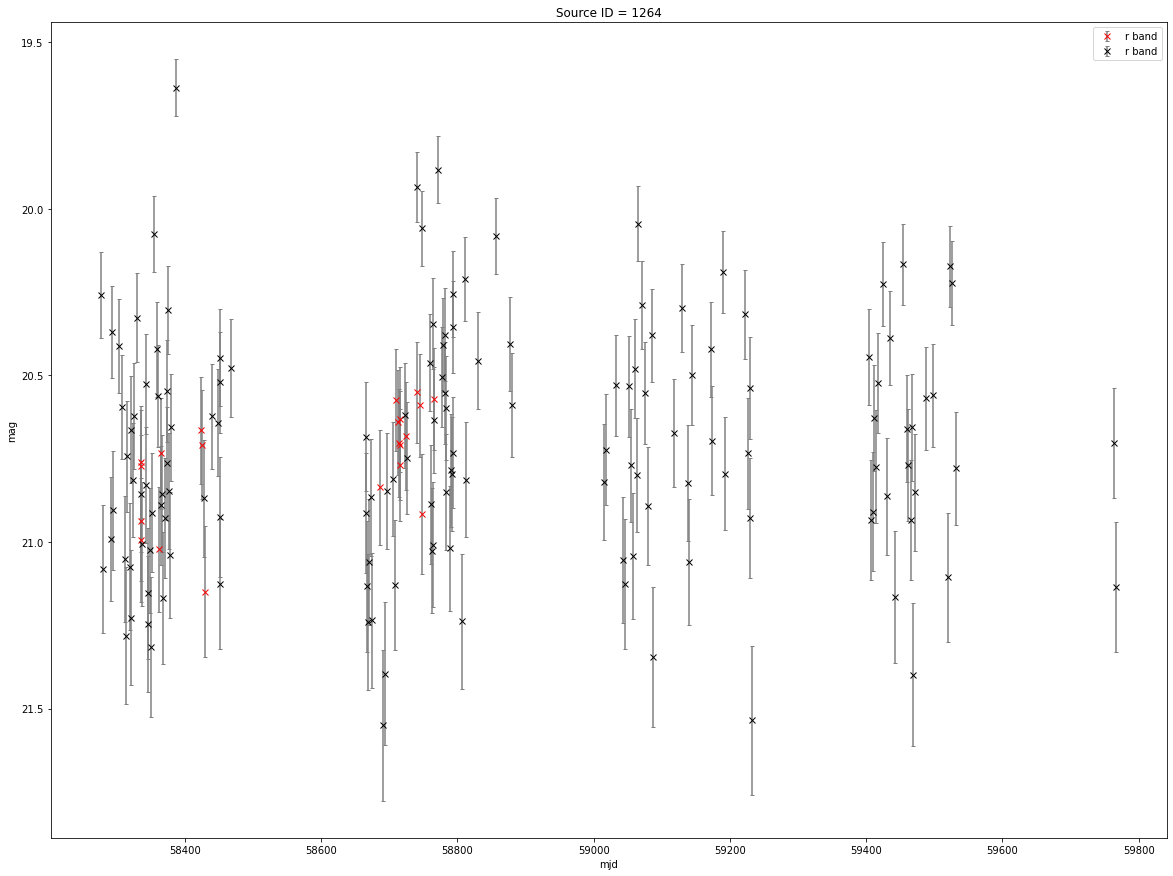

0.006240317253760602 0.0033239275968937193 0.017807041774483487 True
g1


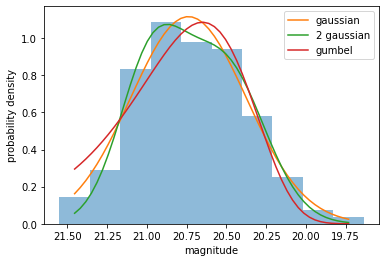

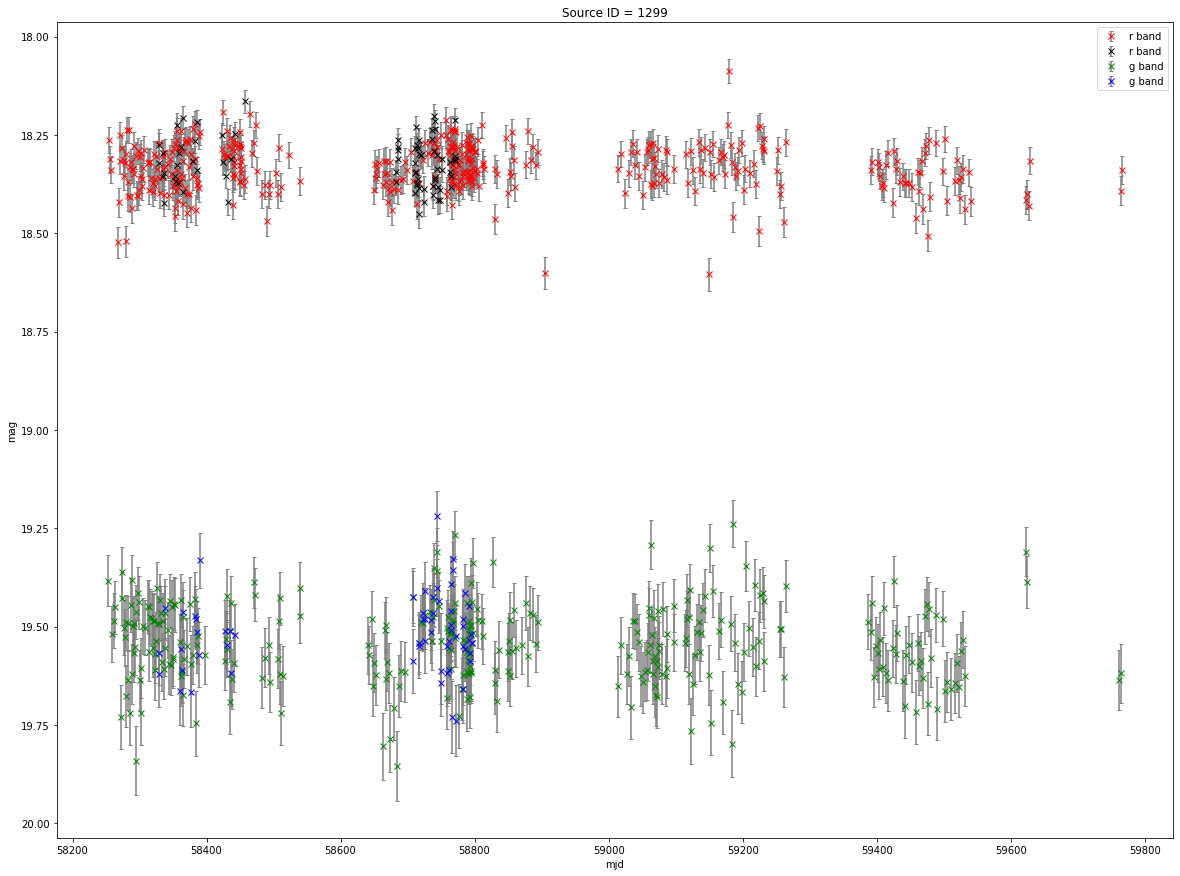

0.21225719823248787 0.011460107658360516 0.4472967585450967 False
g2


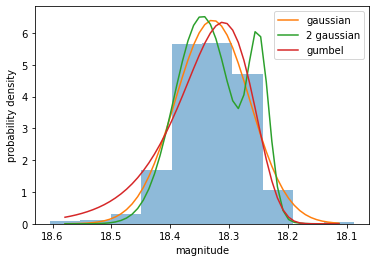

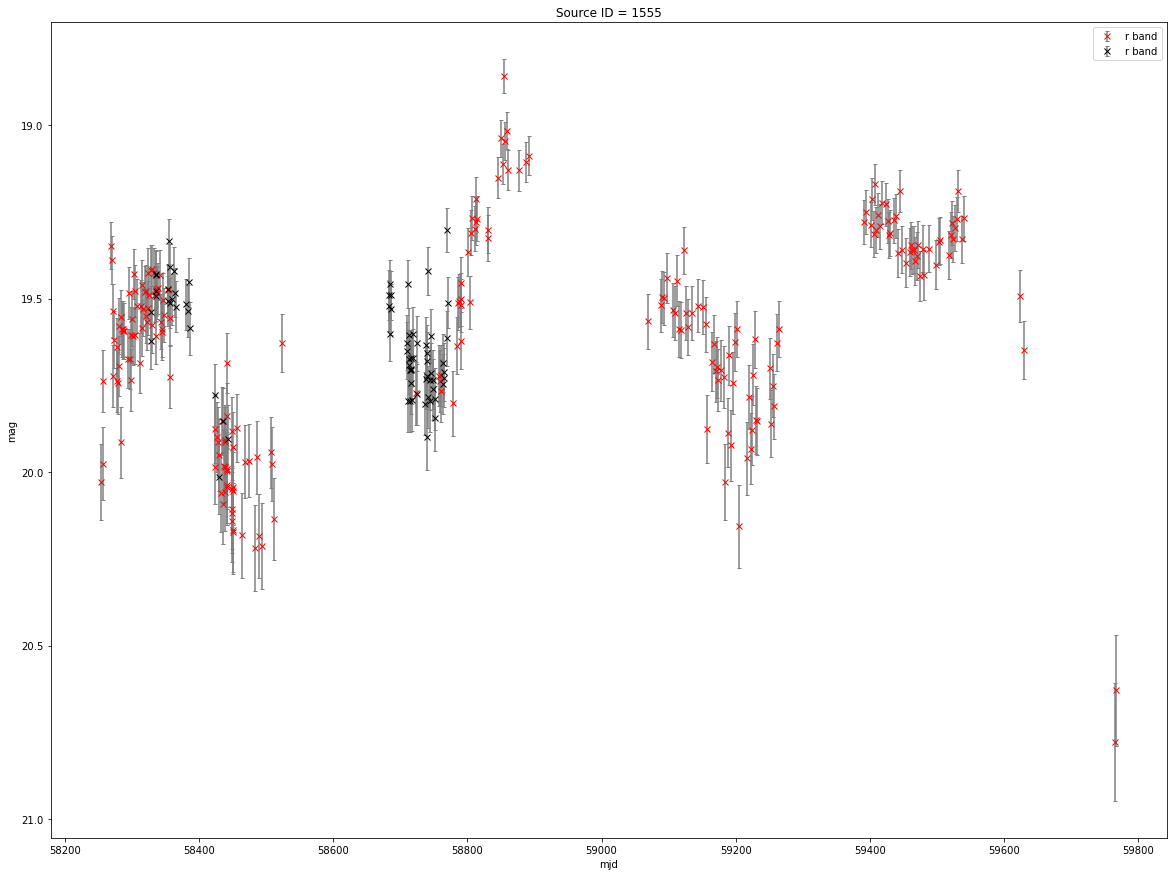

0.03939411251182094 0.0018179471347845358 0.016032611044136842 False
g2


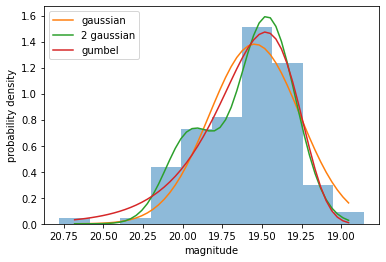

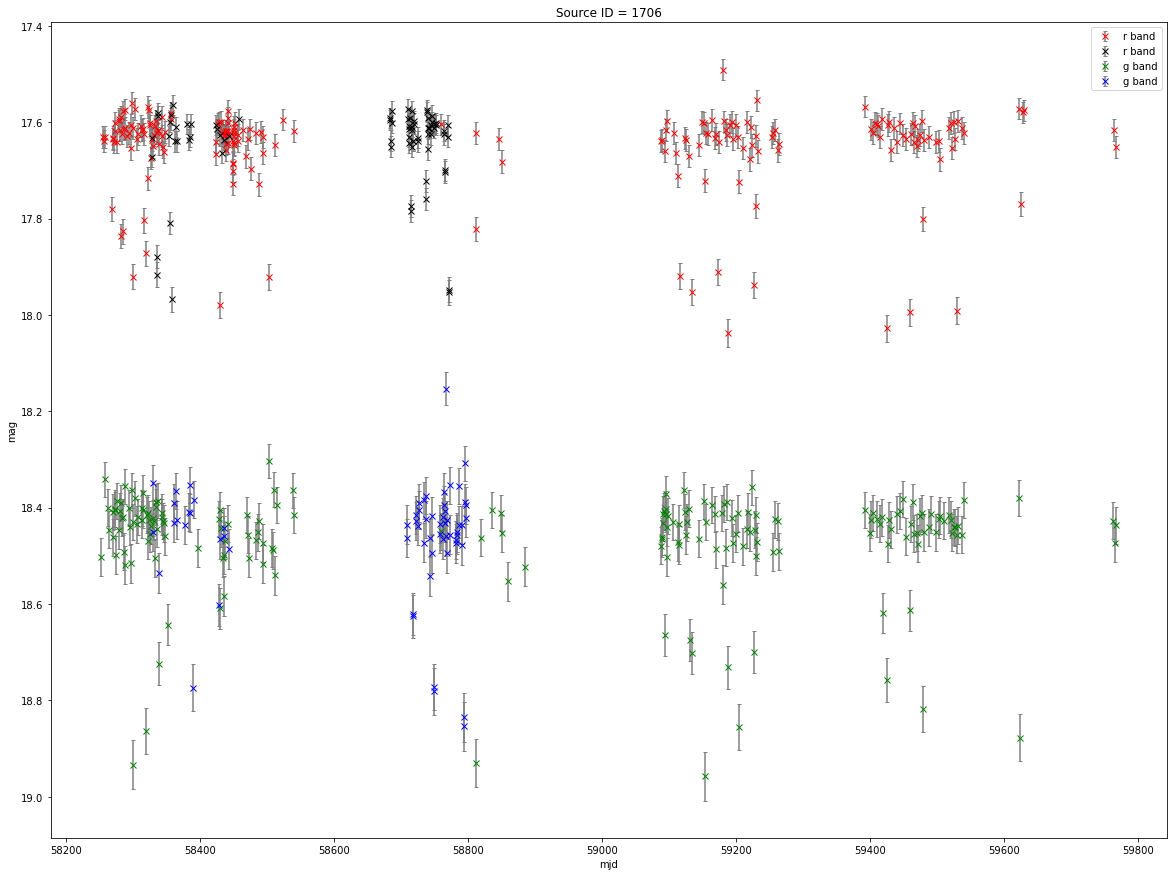

0.12709709447773584 0.009615004665044932 0.10425715024615105 True
gu


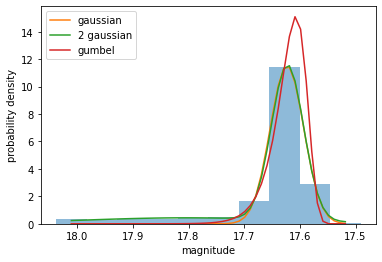

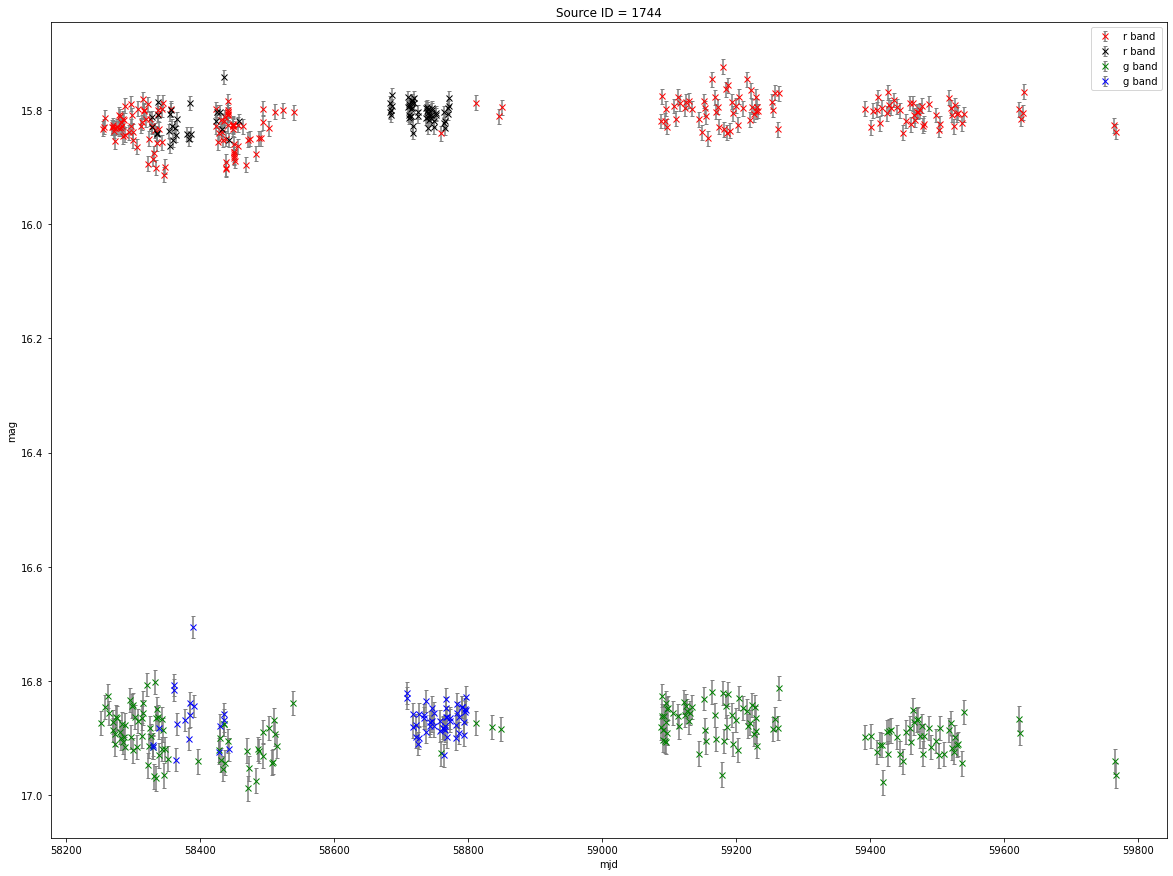

1.5778392524180334 1.2035661775710385 1.43370488897234 False
gu


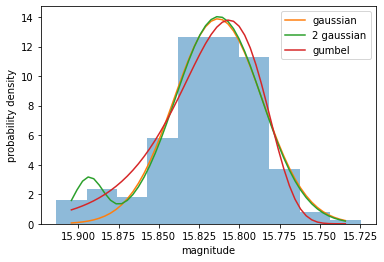

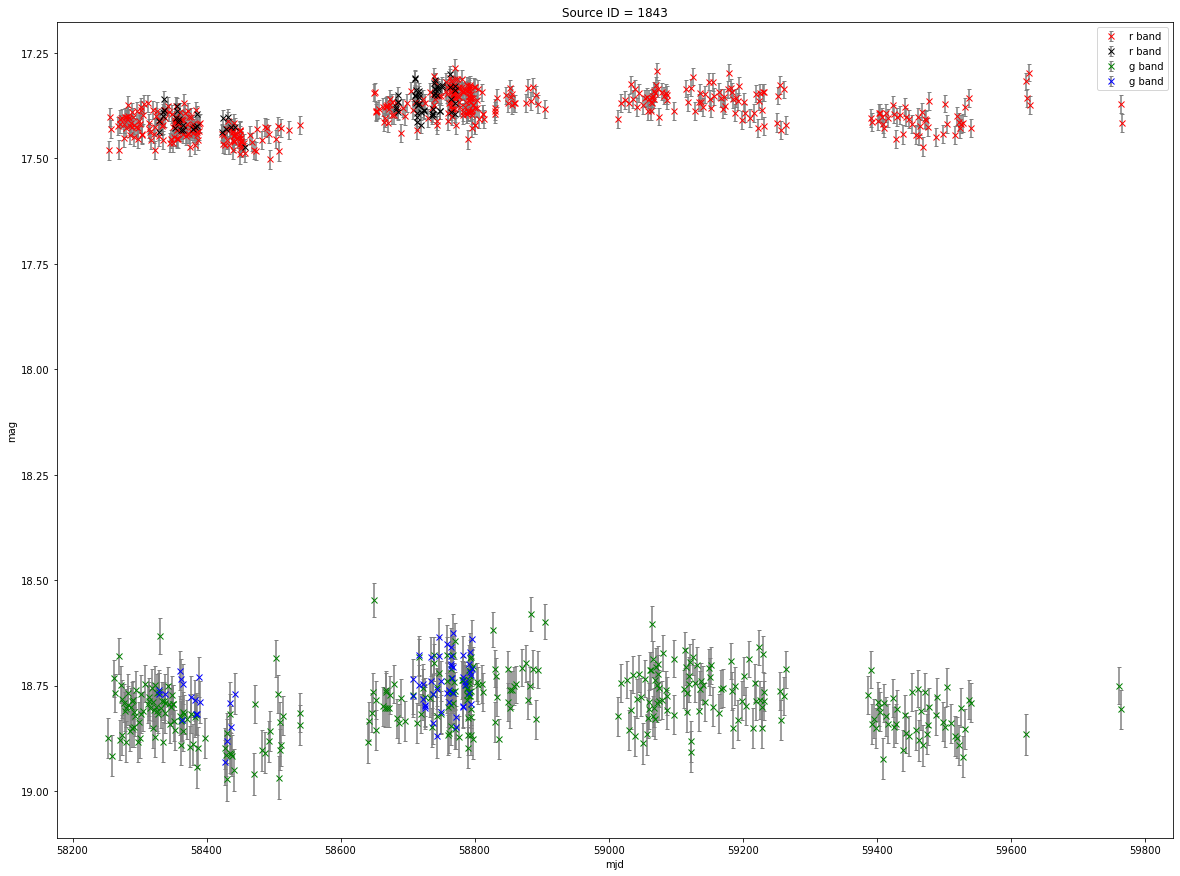

0.9850289689360678 0.2137336500317433 1.0174536386504924 False
g2


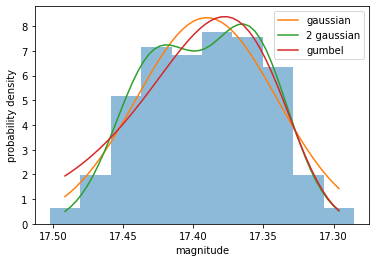

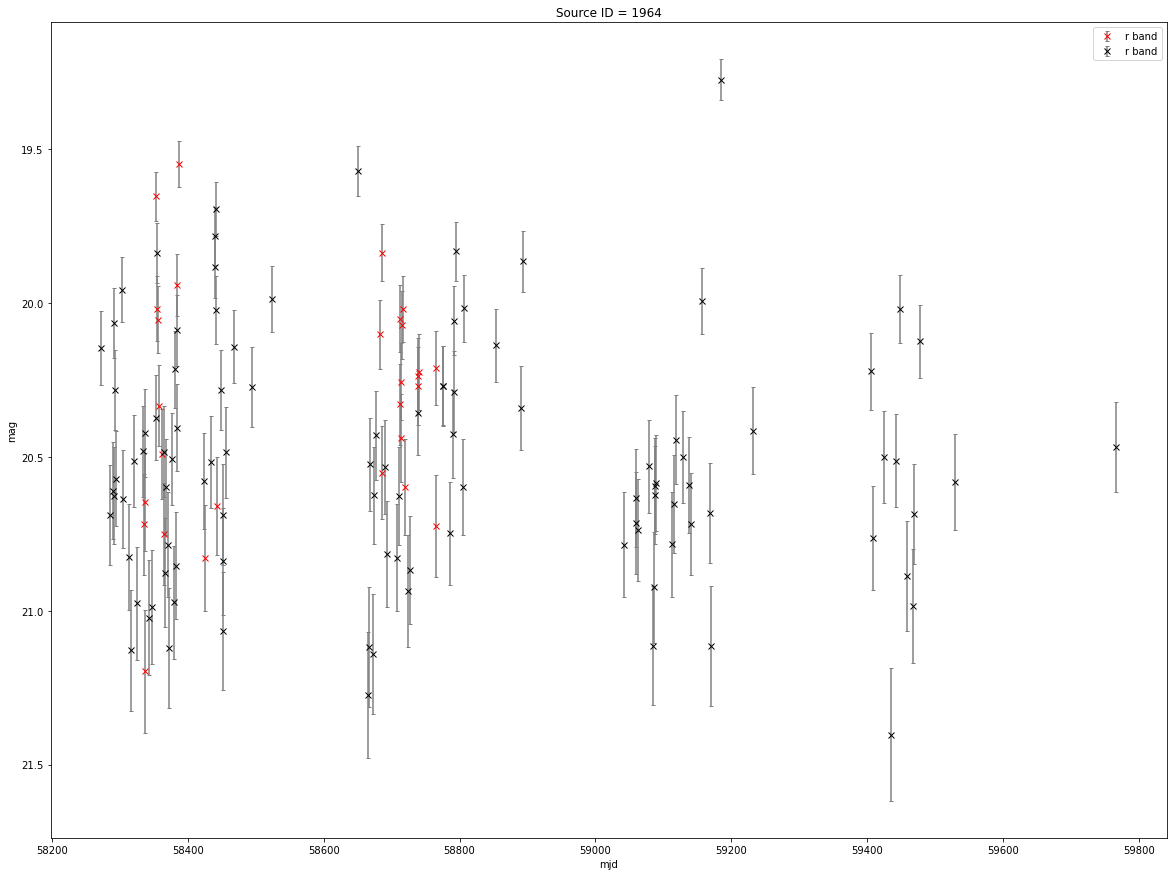

0.012778275341940402 0.008610141978141072 0.03111142696801223 False
g1


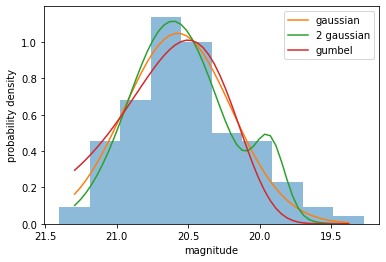

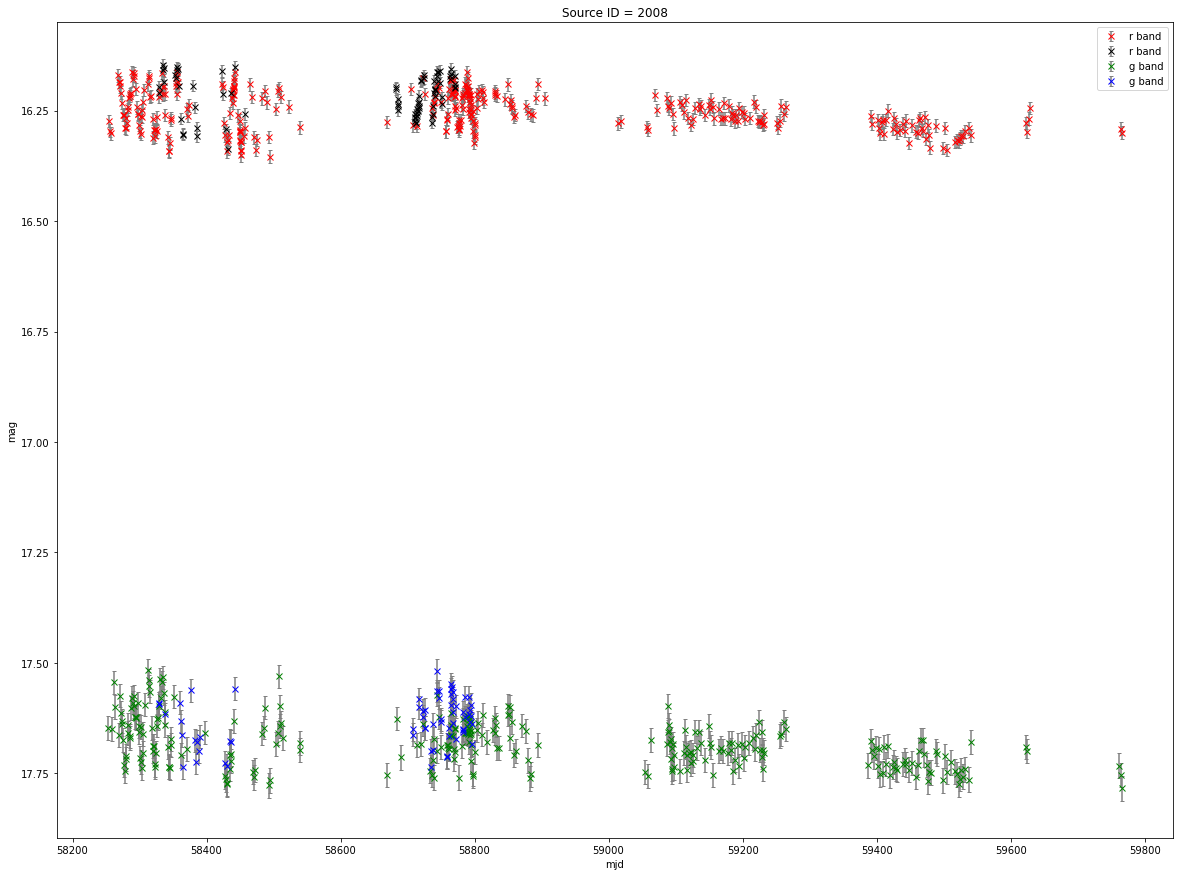

1.8330262720769164 1.1617972537735681 2.672434472018657 False
g1


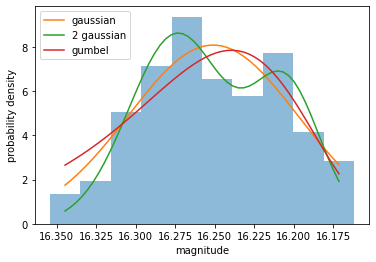

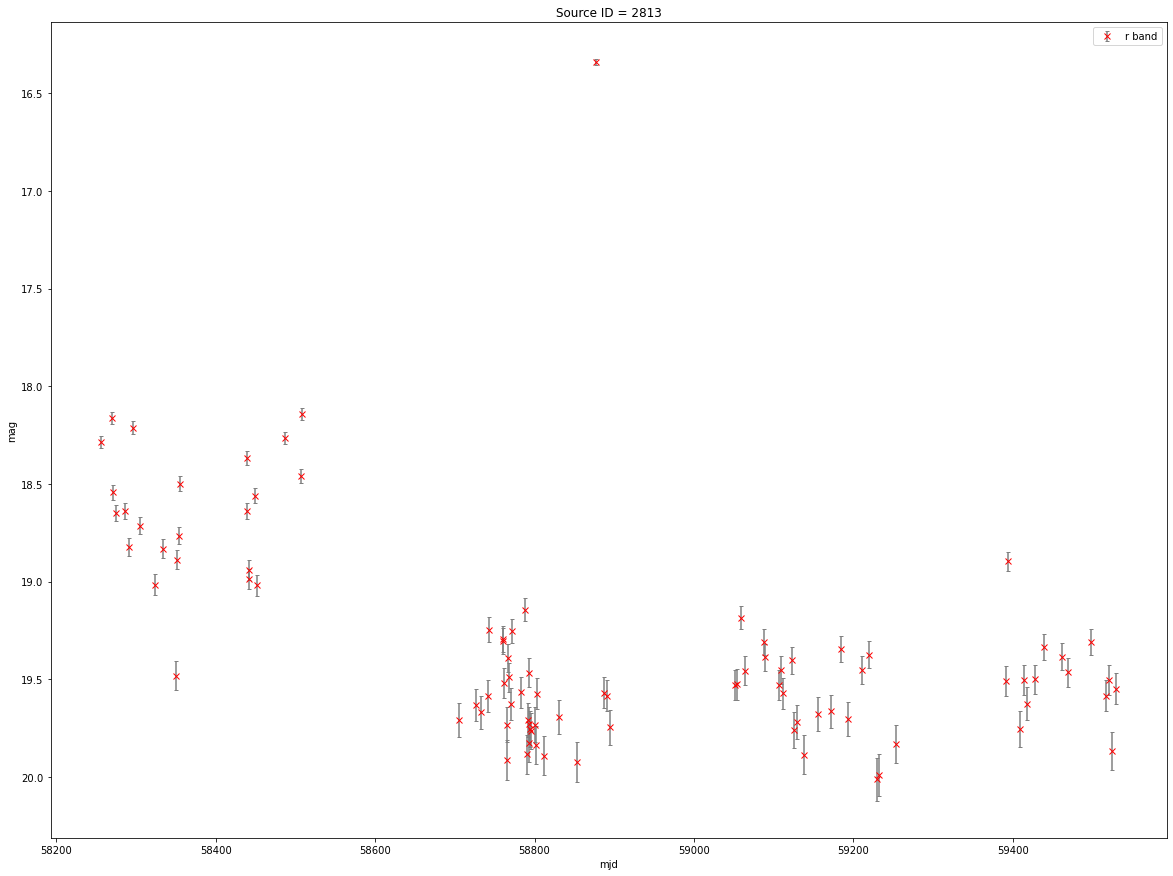

0.018434855263553113 0.032260996341697934 0.019288172808330752 False
g1


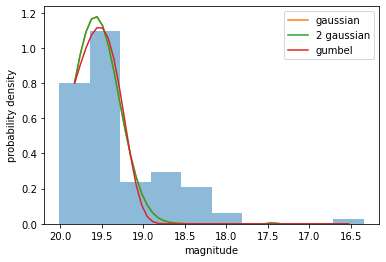

In [10]:
for row in obj_zr:
    functions.draw_lightcurve(row['SourceID'])
    plt.show()
    sqerr_gaussian1,sqerr_gaussian2,sqerr_gumbel,g2_flag=functions.fit_mag(row['OID'])
    print(sqerr_gaussian1,sqerr_gaussian2,sqerr_gumbel,g2_flag)
    print(row['shape'])
    plt.show()

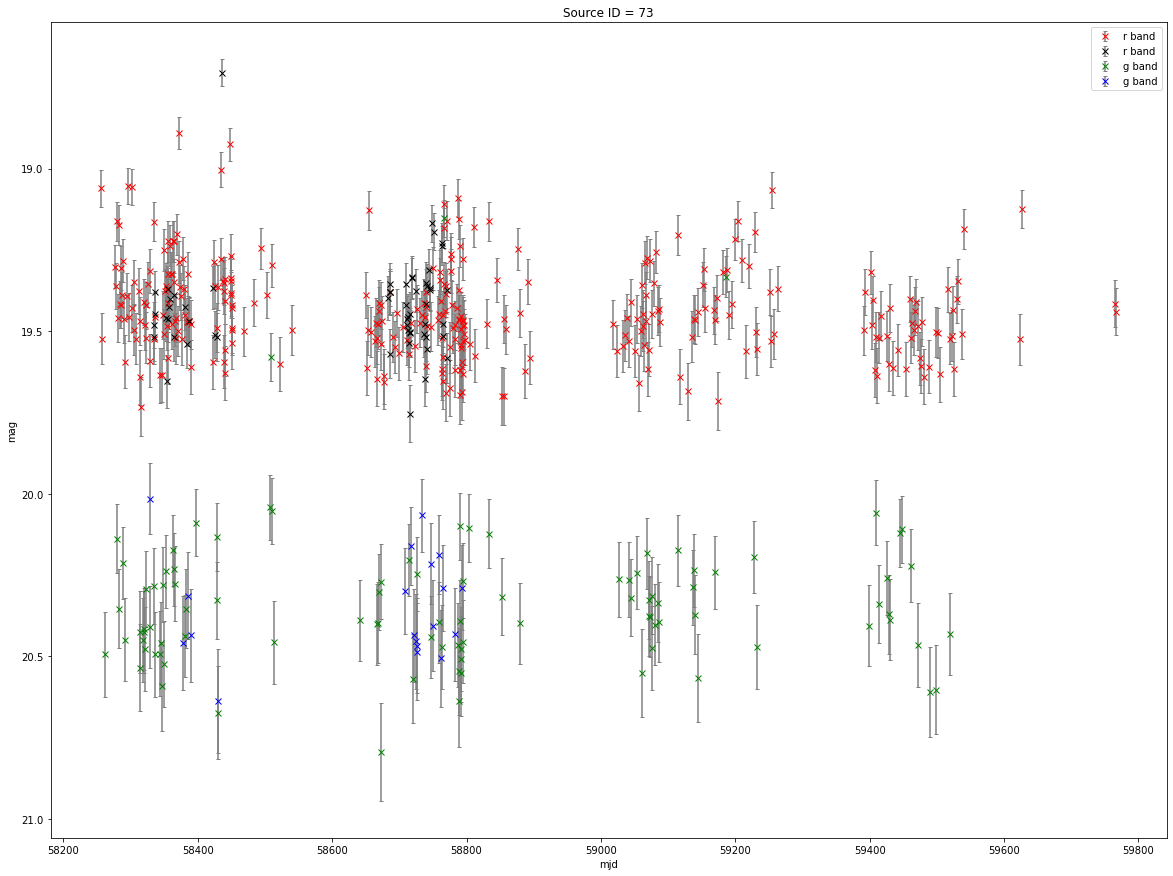

0.009533430482035768 0.01393656832479377 0.05977027922886222 False
g1


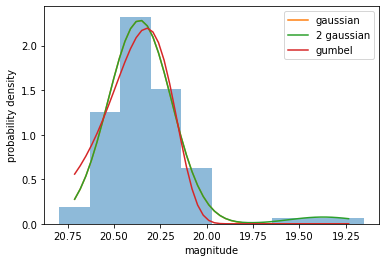

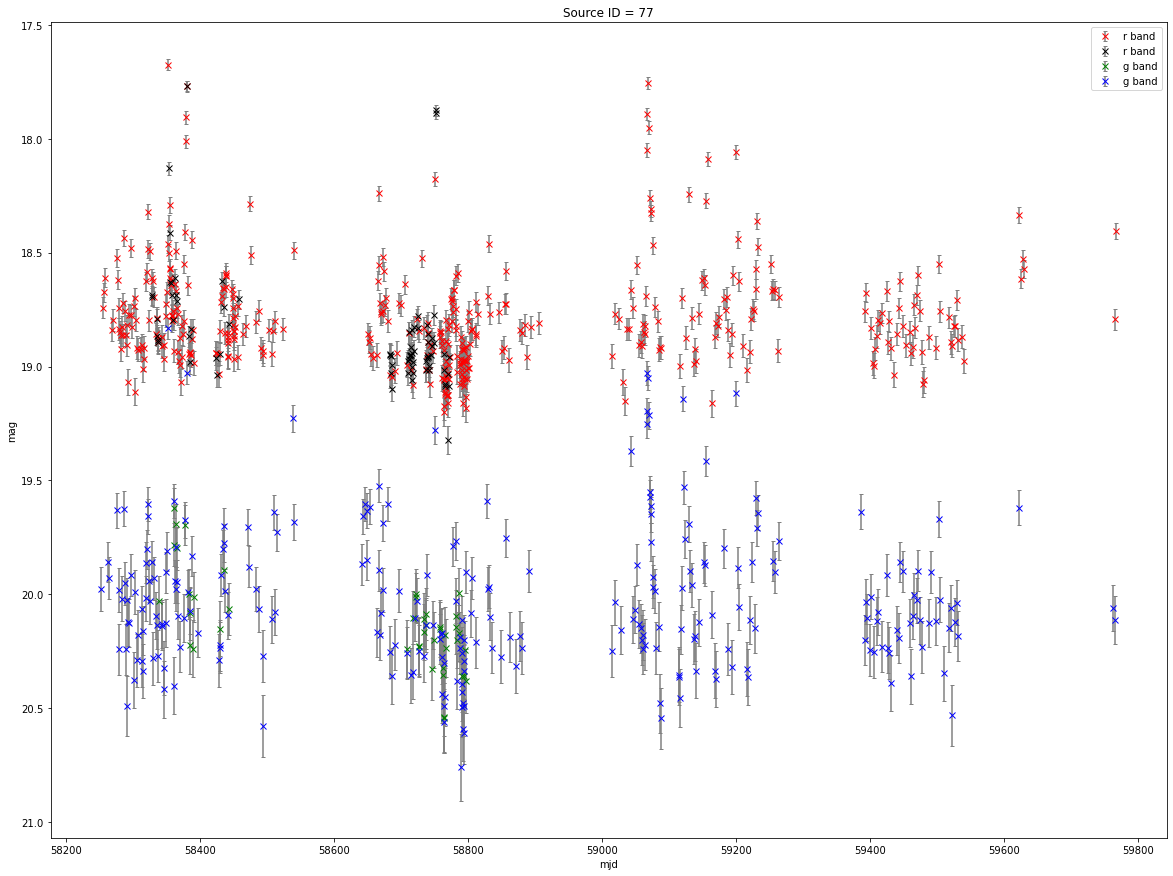

0.012970672357106496 0.004716468677232082 0.04254821537149007 True
g1


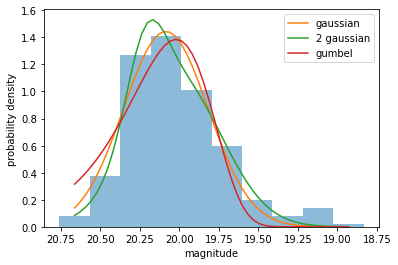

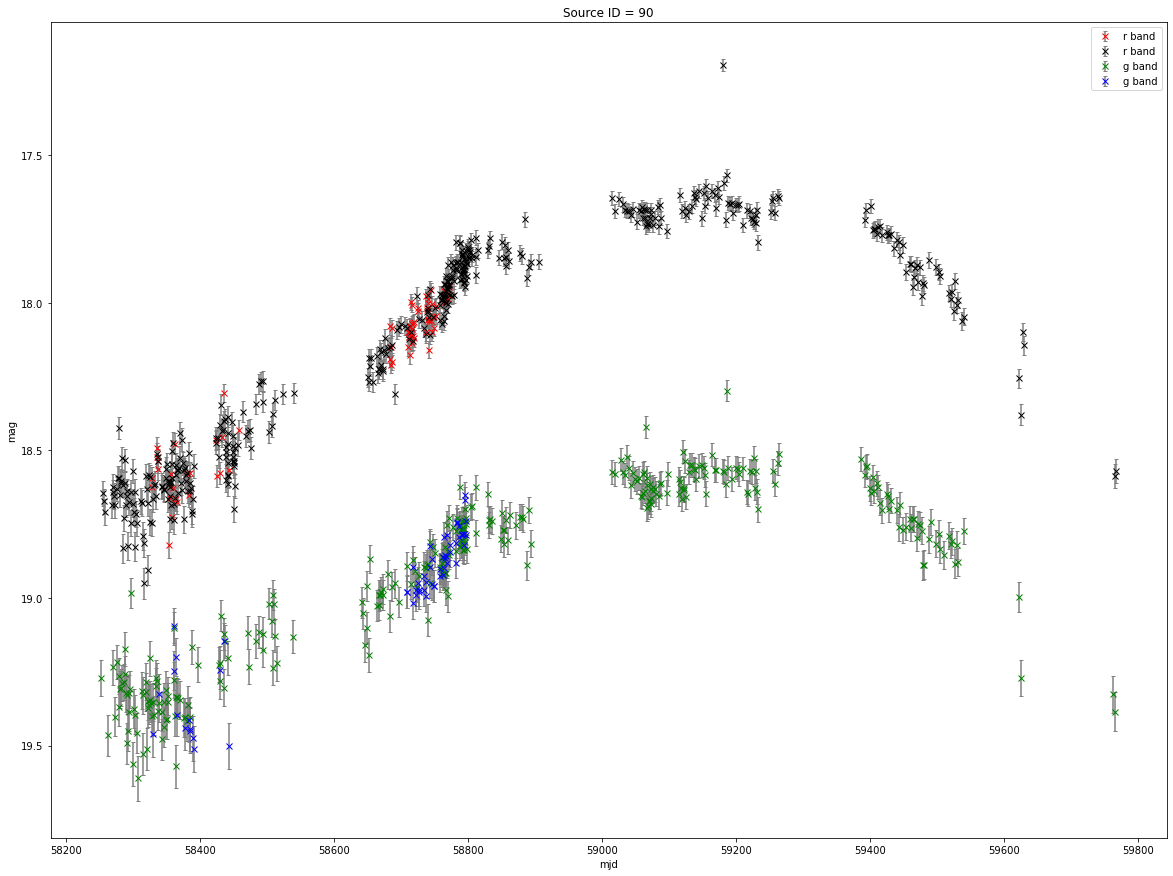

0.23967239977166246 0.05805681475716322 0.1527728485996977 False
g2


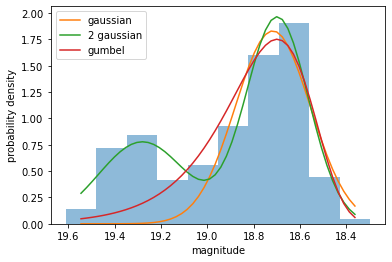

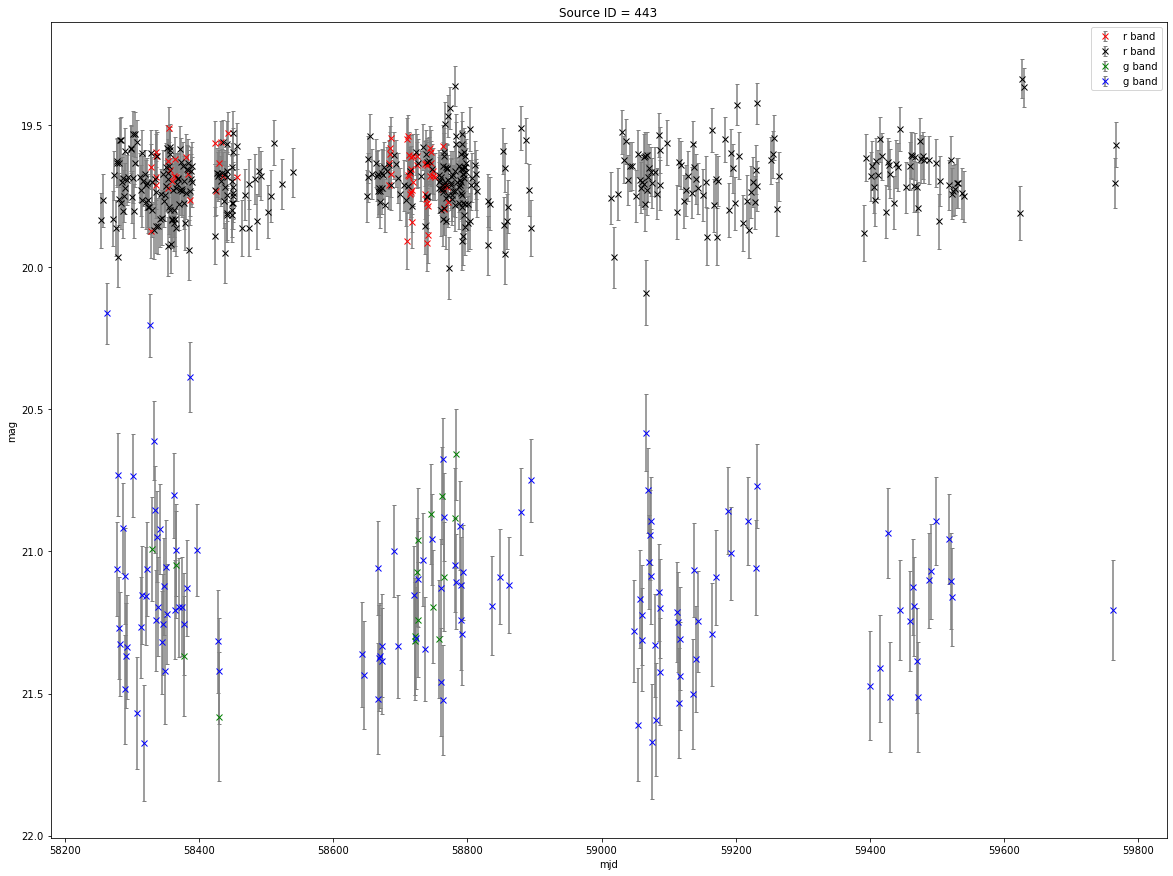

0.010316458679054518 0.006362017515134781 0.030776770835100883 True
g1


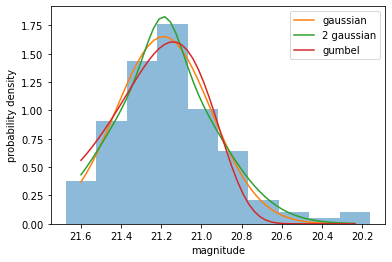

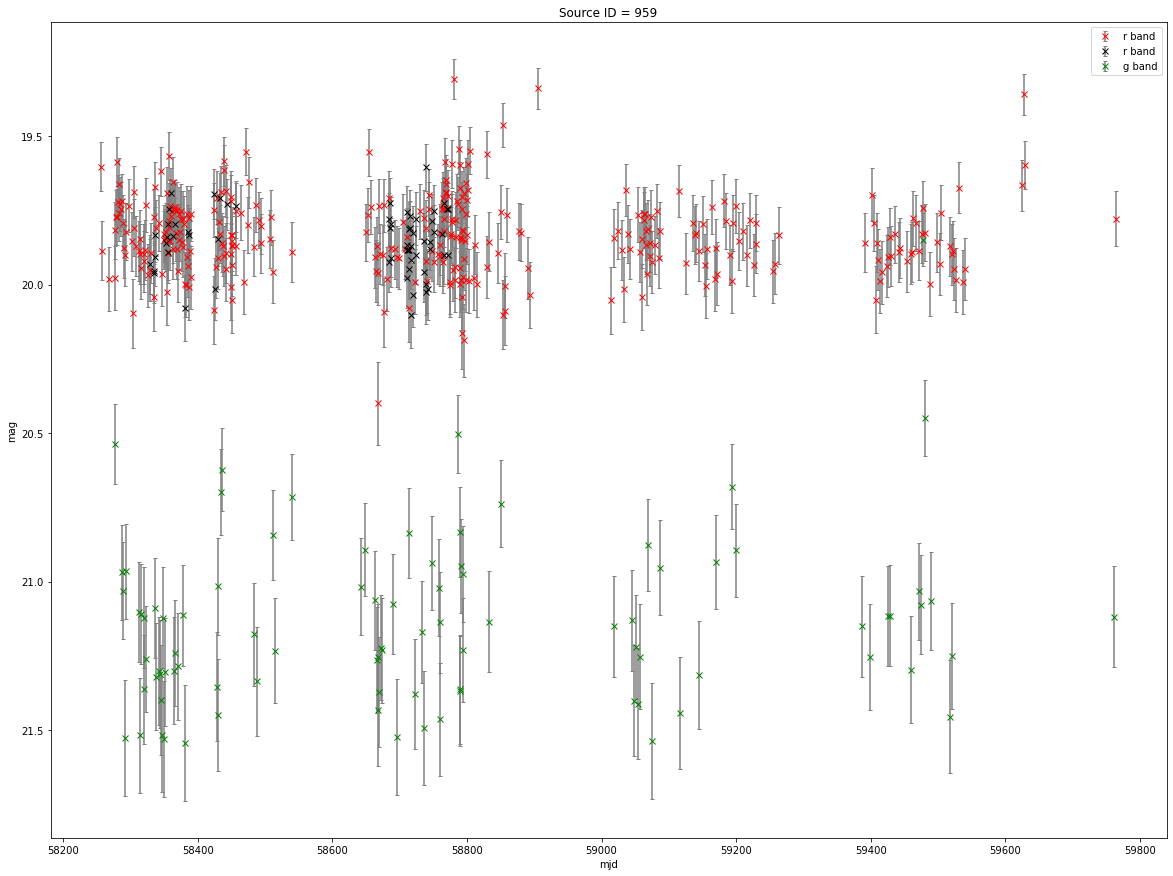

0.00920805259315513 0.005431715300011654 0.017270368757692202 True
g1


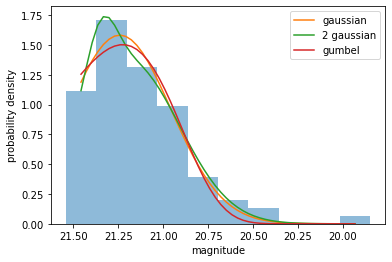

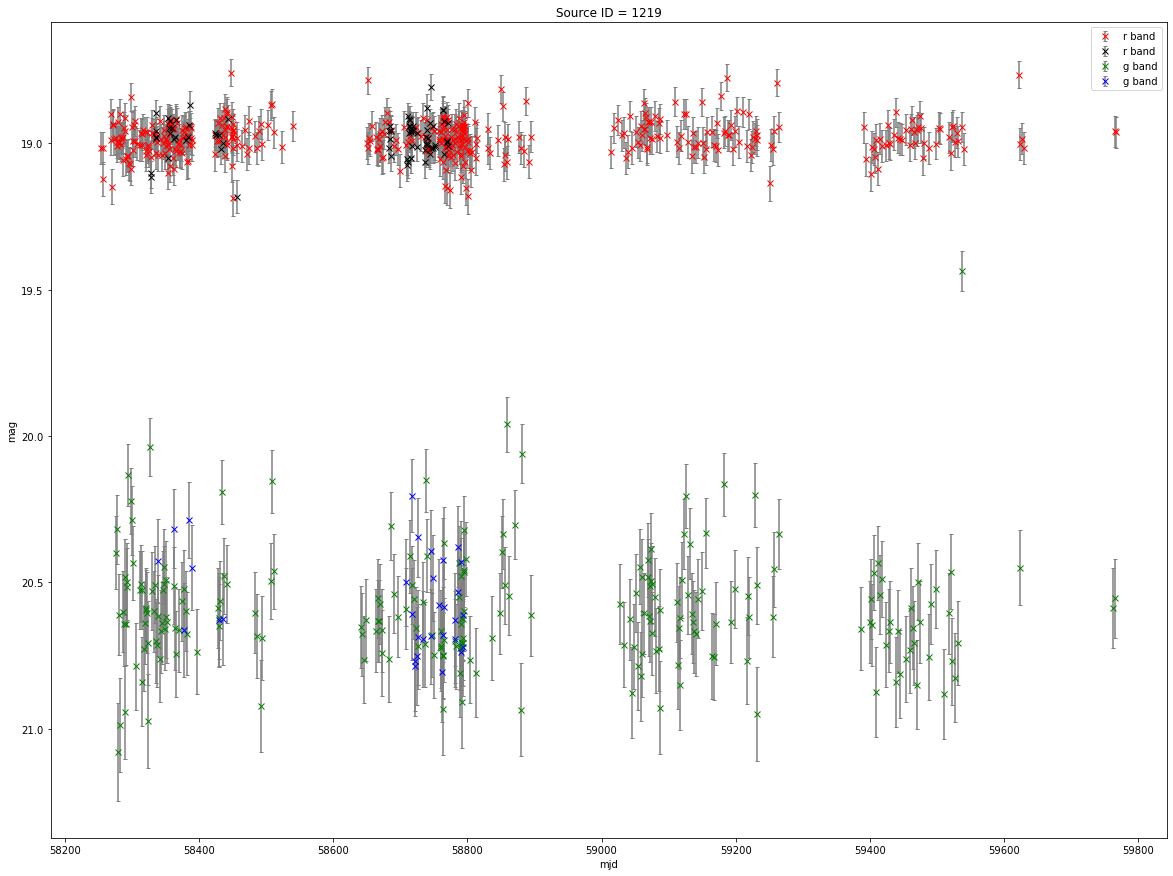

0.02173485481299379 0.00026880113902417123 0.03757309482655187 True
g1


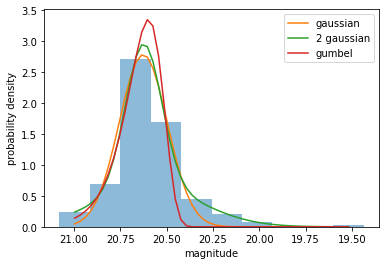

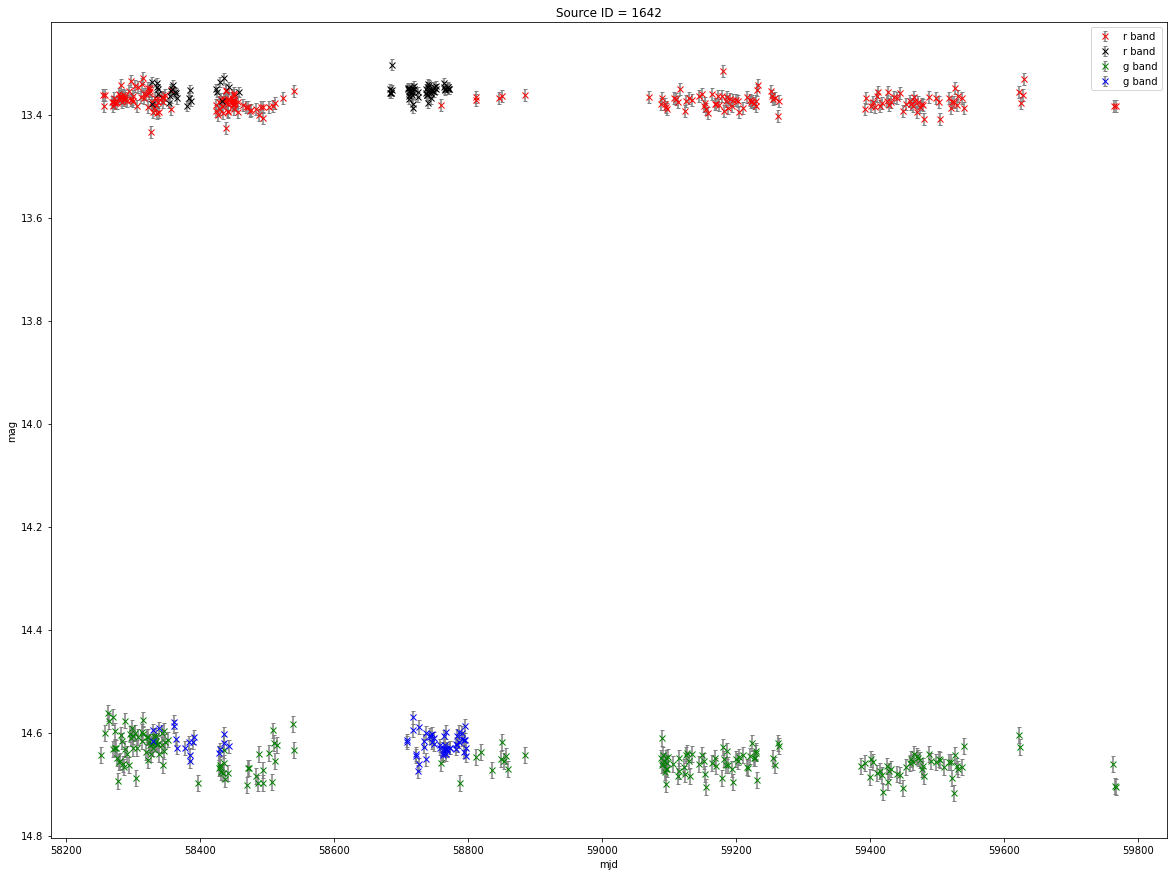

4.193736163476378 0.9840658024648306 7.351528901191218 True
g1


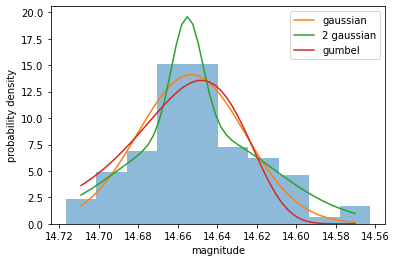

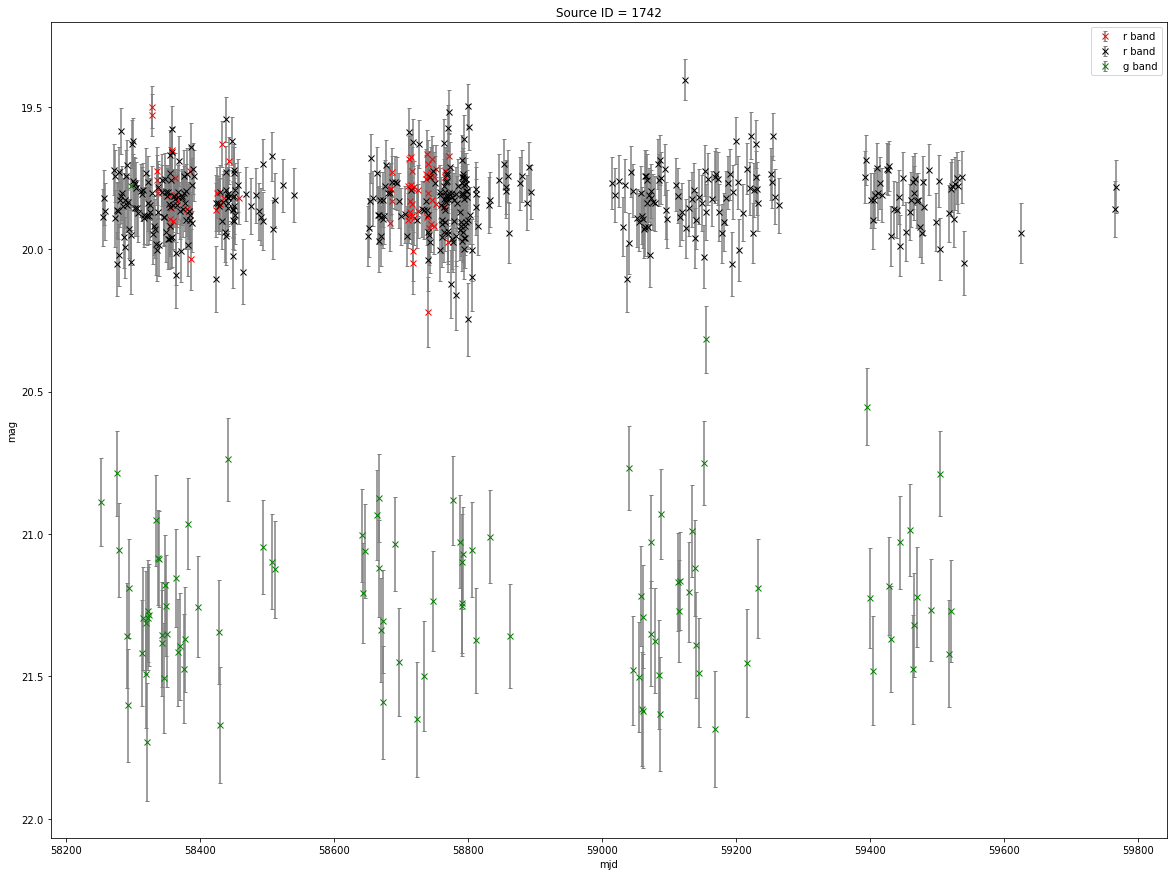

0.007643575159526331 0.011835405577869029 0.022134099139231953 True
g1


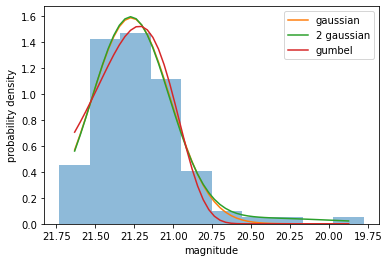

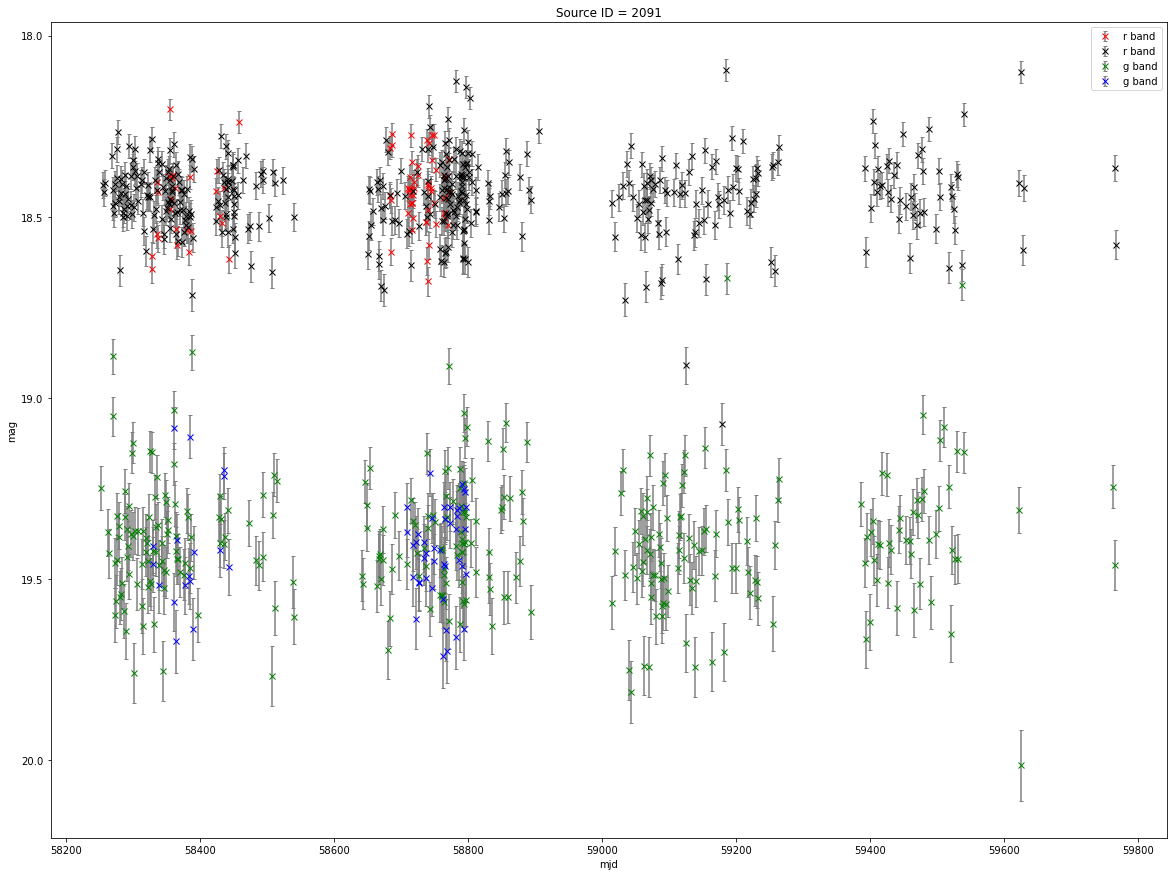

0.002946322151391394 0.0024469729287098147 0.050600627499960874 True
g1


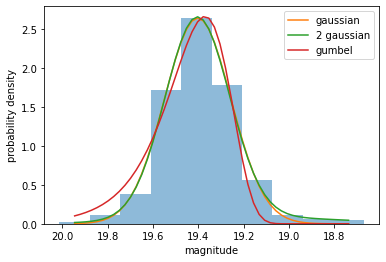

In [11]:
for row in obj_zg:
    functions.draw_lightcurve(row['SourceID'])
    plt.show()
    sqerr_gaussian1,sqerr_gaussian2,sqerr_gumbel,g2_flag=functions.fit_mag(row['OID'])
    print(sqerr_gaussian1,sqerr_gaussian2,sqerr_gumbel,g2_flag)
    print(row['shape'])
    plt.show()